In [211]:
import eurostat
import warnings
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import plotly.express as px
from tabulate import tabulate
import missingno as msno
import plotly.io as pio
pio.renderers

warnings.filterwarnings('ignore')

<h1 style="color:black; background-color:white; padding:5px; padding-bottom:10px;text-align: center">Methodology for in-depth analysis of missing values</h1>

<h2 style="color:black; background-color:white; padding:5px; padding-bottom:10px; margin-bottom:-10px">I. Introduction</h2>
<p style="color:black; background-color:white; padding:5px;">
Data analysis is a fundamental tool for understanding the world around us. The study of dynamics, diversity, similarity, causality, gives us the opportunity to introduce seemingly chaotic processes into logical frameworks using models. But one of the main first steps for any researcher is to "understand" the data to be analyzed. It is precisely the missing parts of the data that appear to be one of the challenges underlying the objectivity of the subsequent tools and models that will be used. This paper attempts to present a methodology for in-depth analysis of missing data. In a logical sequence, the various tools for in-depth analysis of missing data will be revealed step by step.</p>

<h2 style="color:black; background-color:white; padding:5px; padding-bottom:10px; margin-bottom:-10px">II. Theoretical foundations of missing data.</h2>
<p style="color:black; background-color:white; padding:5px;  margin-bottom:-15px">A good explanation of the types of missing data necessary to understand their nature for this report is given in the book: Van Buuren, Stef. Flexible imputation of missing data. CRC press, 2018.</p>
<ul style="color:black; background-color:white; padding:5px; margin-bottom:-10px">Rubin (1976) classified missing data problems into three categories. In his theory every data point has some likelihood of being missing. The process that governs these probabilities is called the missing data mechanism or response mechanism. The model for the process is called the missing data model or response model. </ul>
<li style="color:black; background-color:white; padding:5px">l
If the probability of being missing is the same for all cases, then the data are said to be missing completely at random (MCAR). This effectively implies that causes of the missing data are unrelated to the data. We may consequently ignore many of the complexities that arise because data are missing, apart from the obvious loss of information. An example of MCAR is a weighing scale that ran out of batteries. Some of the data will be missing simply because of bad luck. Another example is when we take a random sample of a population, where each member has the same chance of being included in the sample. The (unobserved) data of members in the population that were not included in the sample are MCAR. While convenient, MCAR is often unrealistic for the data at hand.</li>
<li style="color:black; background-color:white; padding:5px">l
If the probability of being missing is the same only within groups defined by the observed data, then the data are missing at random (MAR). MAR is a much broader class than MCAR. For example, when placed on a soft surface, a weighing scale may produce more missing values than when placed on a hard surface. Such data are thus not MCAR. If, however, we know surface type and if we can assume MCAR within the type of surface, then the data are MAR. Another example of MAR is when we take a sample from a population, where the probability to be included depends on some known property. MAR is more general and more realistic than MCAR. Modern missing data methods generally start from the MAR assumption.</li>
<li style="color:black; background-color:white; padding:5px">l
If neither MCAR nor MAR holds, then we speak of missing not at random (MNAR). In the literature one can also find the term NMAR (not missing at random) for the same concept. MNAR means that the probability of being missing varies for reasons that are unknown to us. For example, the weighing scale mechanism may wear out over time, producing more missing data as time progresses, but we may fail to note this. If the heavier objects are measured later in time, then we obtain a distribution of the measurements that will be distorted. MNAR includes the possibility that the scale produces more missing values for the heavier objects (as above), a situation that might be difficult to recognize and handle. An example of MNAR in public opinion research occurs if those with weaker opinions respond less often. MNAR is the most complex case. Strategies to handle MNAR are to find more data about the causes for the missingness, or to perform what-if analyses to see how sensitive the results are under various scenarios.</li>
<p style="color:black; background-color:white; padding:5px;">
Rubin’s distinction is important for understanding why some methods will work, and others not. His theory lays down the conditions under which a missing data method can provide valid statistical inferences. Most simple fixes only work under the restrictive and often unrealistic MCAR assumption. If MCAR is implausible, such methods can provide biased estimates.</p>


<h2 style="color:black; background-color:white; padding:5px; padding-bottom:10px;margin-bottom:-10px">III. Methodology and empirical analysis </h2>
<p style="color:black; background-color:white; padding:5px;">In the present methodology we will use the Eurostat database. We will import the employment data and the data from it will be used in this report.
The methodology will attempt to probe employment data in depth for the presence of missing values. Missing data will be examined by both columns and rows. In most cases, without explicitly saying "missing values by rows" the unique elements of the text columns will be understood and used.Detailed information about the database is available on the official Eurostat website:
<a href= https://ec.europa.eu/eurostat/cache/metadata/en/employ_esms.htm>https://ec.europa.eu/eurostat/cache/metadata/en/employ_esms.htm</a></p>

<h2 style="color:black; background-color:white; padding:5px; margin-bottom:-15px">Content</h2>
<ol style="color:black; background-color:white; padding-left:20px">In this step, we familiarize ourselves with the data, its parameters and elements. Basic manipulations will be performed to help us use and better understand the elements to continue the research in the next steps. It includes the following manipulations:
<li style="color:black; background-color:white; padding:5px">Import the database</li>
<li style="color:black; background-color:white; padding:5px">Missing values by columns</li>
<li style="color:black; background-color:white; padding:5px">Missing values by rows</li>
<li style="color:black; background-color:white; padding:5px">Missing values by rows in depth</li> 

<li style="color:black; background-color:white; padding:5px">Check for outliers in missing values</li>
<li style="color:black; background-color:white; padding:5px">Missing values using filter</li>
<li style="color:black; background-color:white; padding:5px">Visualization of missing values</li>
<li style="color:black; background-color:white; padding:5px">IVisualization of missing values by rows in depth</li>
<li style="color:black; background-color:white; padding:5px">Remove patterns and compare the result</li>
<li style="color:black; background-color:white; padding:5px">Cluster visualization of missing values</li>
</ol>

<h3 style="color:black; background-color:white; padding:5px; padding-bottom:10px; margin-bottom:-10px">1. Import the database</h3>
<p style="color:black; background-color:white; padding:5px;">
In the first step, two main things are done: on the one hand, the database is imported, on the other hand, its main elements are extracted, which will allow us to acquire basic information about the database that will be the subject of an example study.</p>

In [2]:
def import_data (**kwargs):
    global key
    for key, value in kwargs.items():
        df_name = key
        globals()[df_name] = eurostat.get_data_df(value)
        return globals()[df_name]

In [3]:
import_data(df_employment_example = "lfsa_ergaed")

,unit,sex,age,isced11,geo\time,2021,2020,2019,2018,2017,...,1992,1991,1990,1989,1988,1987,1986,1985,1984,1983
0,PC,F,Y15-19,ED0-2,AT,24.3,24.6,23.2,24.8,23.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,PC,F,Y15-19,ED0-2,BE,6.5,6.4,7.8,7.7,4.5,...,3.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,PC,F,Y15-19,ED0-2,BG,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,PC,F,Y15-19,ED0-2,CH,42.2,42.7,44.5,46.6,46.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,PC,F,Y15-19,ED0-2,CY,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17703,PC,T,Y70-74,TOTAL,SE,10.8,11.9,10.8,10.4,10.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17704,PC,T,Y70-74,TOTAL,SI,3.4,2.6,2.3,4.6,3.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17705,PC,T,Y70-74,TOTAL,SK,4.2,3.2,3.4,3.4,3.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17706,PC,T,Y70-74,TOTAL,TR,NaN,10.1,12.2,12.2,12.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
def uniques (df):
    print(f"Names of columns (features): \n{df.columns}")
    for col in df:
        if not df[col].dtype == "float" or df[col].dtype == "int":
            print(f"\nElements of columns (observations): \"{col}\": \n {df[col].unique()}")
            print(f"Number of elements of columns (observations): \"{col}\": \n {df[col].unique().size}")

        else:
            pass
    print(f"\nThe unique observation of a feature in which periods are mentioned is not logically applicable at this stage of the analysis")

In [5]:
uniques(df_employment_example)

Names of columns (features): 
Index([    'unit',      'sex',      'age',  'isced11', 'geo\time',       2021,
             2020,       2019,       2018,       2017,       2016,       2015,
             2014,       2013,       2012,       2011,       2010,       2009,
             2008,       2007,       2006,       2005,       2004,       2003,
             2002,       2001,       2000,       1999,       1998,       1997,
             1996,       1995,       1994,       1993,       1992,       1991,
             1990,       1989,       1988,       1987,       1986,       1985,
             1984,       1983],
      dtype='object')

Elements of columns (observations): "unit": 
 ['PC']
Number of elements of columns (observations): "unit": 
 1

Elements of columns (observations): "sex": 
 ['F' 'M' 'T']
Number of elements of columns (observations): "sex": 
 3

Elements of columns (observations): "age": 
 ['Y15-19' 'Y15-24' 'Y15-39' 'Y15-59' 'Y15-64' 'Y15-74' 'Y20-24' 'Y20-29'
 'Y20-64' 'Y25-

In [6]:
def db_info (df):
    observations = None
    features = None
    observations, features = df.shape
    print("1. Оbservations and features: \n {} Оbservations and {} features".format(observations, features))
    print("-------------------------------")
    print (f"2. Number of cases in the table: {df.size}")
    print("--------------------------------")
    print(f"3. The sum of element types by type is as follows: \n {df.dtypes.value_counts(ascending=True)}")
    print("--------------------------------")

    list_objects = []
    list_float64 = []

    for col in df.columns:
        if df[col].dtypes == "object":
            list_objects += [col]
        elif df[col].dtypes == "float64":
            list_float64 += [col]
    print("4. Group the features by data type:")
    print(f" object = {list_objects} \n")
    print(f" float64 = {list_float64}")
    print("--------------------------------------------------------------------------------")

    return df.applymap(type).apply(pd.value_counts).fillna(0)

In [7]:
db_info(df_employment_example)

1. Оbservations and features: 
 17708 Оbservations and 44 features
-------------------------------
2. Number of cases in the table: 779152
--------------------------------
3. The sum of element types by type is as follows: 
 object      5
float64    39
dtype: int64
--------------------------------
4. Group the features by data type:
 object = ['unit', 'sex', 'age', 'isced11', 'geo\\time'] 

 float64 = [2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999, 1998, 1997, 1996, 1995, 1994, 1993, 1992, 1991, 1990, 1989, 1988, 1987, 1986, 1985, 1984, 1983]
--------------------------------------------------------------------------------


,unit,sex,age,isced11,geo\time,2021,2020,2019,2018,2017,...,1992,1991,1990,1989,1988,1987,1986,1985,1984,1983
<class 'str'>,17708.0,17708.0,17708.0,17708.0,17708.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
<class 'float'>,0.0,0.0,0.0,0.0,0.0,17708.0,17708.0,17708.0,17708.0,17708.0,...,17708.0,17708.0,17708.0,17708.0,17708.0,17708.0,17708.0,17708.0,17708.0,17708.0


<ul style="color:black; background-color:white; padding:5px; margin-bottom:-10px">The results of the above functions reveal the following important things:</ul>
<li style="color:black; background-color:white; padding:5px">we see that the Unit column is fixed and for this reason it can be dropped;</li>
<li style="color:black; background-color:white; padding:5px">the database shows employment in Europe in a time range from 1983 to 2021, with the time unit being a year;</li>
<li style="color:black; background-color:white; padding:5px">employment is measured by gender, age, level of education;</li>
<li style="color:black; background-color:white; padding:5px">a total of 17708 rows and 44 columns;</li>
<li style="color:black; background-color:white; padding:5px">the values ​​of the text columns are from the team string, the values ​​of the year columns are floats;</li>
<li style="color:black; background-color:white; padding:5px">the name of the columns with years is again a float, which requires their transformation into a string to avoid problems in the next steps of analysis.</li>

In [8]:
df_employment_example = df_employment_example.drop(["unit"], axis=1)
df_employment_example.columns = df_employment_example.columns.map(str)

In [9]:
uniques(df_employment_example)

Names of columns (features): 
Index(['sex', 'age', 'isced11', 'geo\time', '2021', '2020', '2019', '2018',
       '2017', '2016', '2015', '2014', '2013', '2012', '2011', '2010', '2009',
       '2008', '2007', '2006', '2005', '2004', '2003', '2002', '2001', '2000',
       '1999', '1998', '1997', '1996', '1995', '1994', '1993', '1992', '1991',
       '1990', '1989', '1988', '1987', '1986', '1985', '1984', '1983'],
      dtype='object')

Elements of columns (observations): "sex": 
 ['F' 'M' 'T']
Number of elements of columns (observations): "sex": 
 3

Elements of columns (observations): "age": 
 ['Y15-19' 'Y15-24' 'Y15-39' 'Y15-59' 'Y15-64' 'Y15-74' 'Y20-24' 'Y20-29'
 'Y20-64' 'Y25-29' 'Y25-49' 'Y25-54' 'Y25-59' 'Y25-64' 'Y25-74' 'Y30-34'
 'Y30-54' 'Y35-39' 'Y40-44' 'Y40-59' 'Y40-64' 'Y45-49' 'Y50-54' 'Y50-59'
 'Y50-64' 'Y50-74' 'Y55-59' 'Y55-64' 'Y60-64' 'Y65-69' 'Y65-74' 'Y70-74']
Number of elements of columns (observations): "age": 
 32

Elements of columns (observations): "isced11": 


---

<h3 style="color:black; background-color:white; padding:5px; padding-bottom:10px; margin-bottom:-10px">2. Missing values by columns</h3>
<p style="color:black; background-color:white; padding:5px;">
In this step, we run a check for missing values on all columns. As a result, the missing values will be presented as an absolute number and as a relative number. The relative is calculated based on the percentage of missing values of the column from all elements of the column itself.</p>

In [10]:
def missing_values_features(df):
    df_missing = df.isna().sum()
    b = df_missing / len(df)
    df_missing_relative = b.map(lambda n: '{:,.2%}'.format(n))
    print("Missing values")
    missing_all = pd.concat([df_missing, df_missing_relative], axis=1, keys=('Absolute number','Relative number'))

    missing_all.index = missing_all.index.map(str)
    
    fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(10,12))
    axes[0].barh(missing_all.index, missing_all["Absolute number"])
    axes[0].set(title='Absolute number')
    axes[0].invert_xaxis()

    axes[0].yaxis.tick_right()

    axes[1].barh(missing_all.index, (b*100), color = "c")
    axes[1].set(title='Relative number')


    axes[0].bar_label(axes[0].barh(missing_all.index, missing_all["Absolute number"]), label_type='center')
    axes[1].bar_label((axes[1].barh(missing_all.index, (b*100))), fmt='%.2f')

    fig.tight_layout()
    fig.subplots_adjust(wspace=0.18)
    plt.show()

Missing values


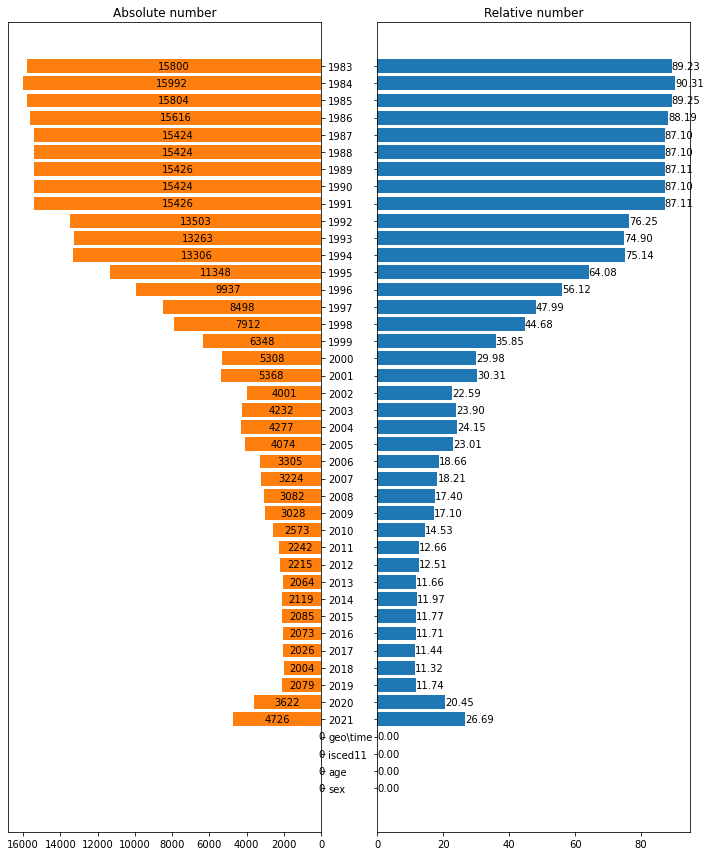

In [11]:
missing_values_features(df_employment_example)

<p style="color:black; background-color:white; padding:5px;">
The chart shows that by 1996, missing column values exceed 55%, and in the years prior to 1991, they exceed 87%. Since 2002, missing values have been below 25%, and after 2010 they fell below 15%. This indicates that we have a large number of missing values and need further investigation in order to optimize the data.</p>

---

<h3 style="color:black; background-color:white; padding:5px; padding-bottom:10px; margin-bottom:-10px">3. Missing values by rows</h3>
<p style="color:black; background-color:white; padding:5px;">
In this step, the missing values are analyzed not by columns but by rows. Under rows, we look at the unique elements of each column and sum the missing values of all the rows associated with it.</p>

In [203]:
def missing_rows (df):
     for col in df.columns:
        if not df[col].dtype == "float" or df[col].dtype == "int":
            missing_model = df.groupby(col).apply(lambda x: x.isna().sum().sum()).to_frame(name=None).reset_index()
            missing_model.rename({0:"missing"}, inplace=True, axis=1)
            print(tabulate(missing_model, headers = 'keys', tablefmt = 'psql'))
            fig = px.bar(missing_model, x=missing_model[missing_model.columns[0]], y = missing_model["missing"], 
                    labels={"missing": "Липсващи стойности"},width=1200, height=400)
            fig.show(renderer="svg")
        else:
            pass

+----+-------+-----------+
|    | sex   |   missing |
|----+-------+-----------|
|  0 | F     |    100115 |
|  1 | M     |     97958 |
|  2 | T     |     96105 |
+----+-------+-----------+


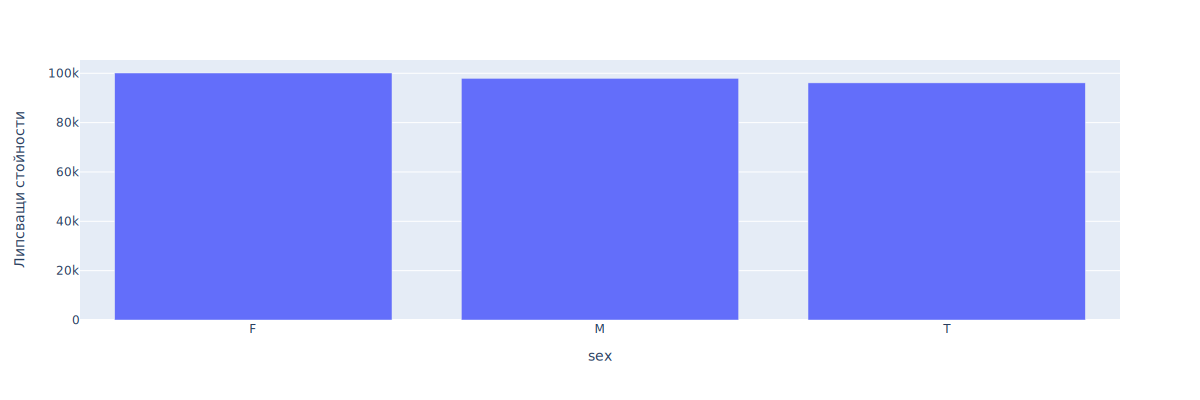

+----+--------+-----------+
|    | age    |   missing |
|----+--------+-----------|
|  0 | Y15-19 |     11749 |
|  1 | Y15-24 |      9348 |
|  2 | Y15-39 |      8935 |
|  3 | Y15-59 |      8871 |
|  4 | Y15-64 |      8864 |
|  5 | Y15-74 |      8858 |
|  6 | Y20-24 |      9188 |
|  7 | Y20-29 |      8890 |
|  8 | Y20-64 |      8686 |
|  9 | Y25-29 |      8961 |
| 10 | Y25-49 |      8652 |
| 11 | Y25-54 |      8634 |
| 12 | Y25-59 |      8624 |
| 13 | Y25-64 |      8615 |
| 14 | Y25-74 |      8608 |
| 15 | Y30-34 |      8776 |
| 16 | Y30-54 |      8633 |
| 17 | Y35-39 |      8943 |
| 18 | Y40-44 |      8920 |
| 19 | Y40-59 |      8610 |
| 20 | Y40-64 |      8594 |
| 21 | Y45-49 |      8922 |
| 22 | Y50-54 |      8925 |
| 23 | Y50-59 |      8715 |
| 24 | Y50-64 |      8682 |
| 25 | Y50-74 |      8702 |
| 26 | Y55-59 |      8837 |
| 27 | Y55-64 |      8747 |
| 28 | Y60-64 |      9354 |
| 29 | Y65-69 |     11204 |
| 30 | Y65-74 |     10662 |
| 31 | Y70-74 |     13469 |
+----+--------+-----

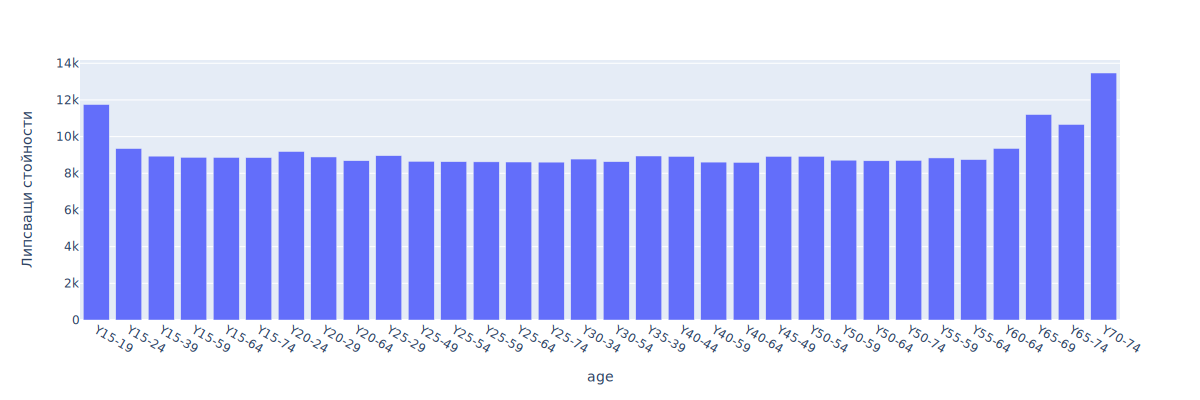

+----+-----------+-----------+
|    | isced11   |   missing |
|----+-----------+-----------|
|  0 | ED0-2     |     57847 |
|  1 | ED3_4     |     57766 |
|  2 | ED5-8     |     59842 |
|  3 | NRP       |     74389 |
|  4 | TOTAL     |     44334 |
+----+-----------+-----------+


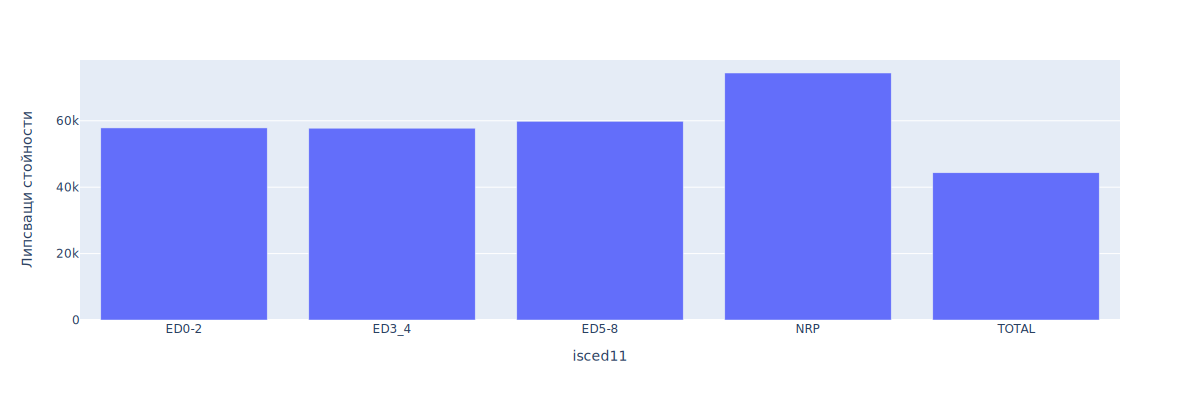

+----+------------+-----------+
|    | geo\time   |   missing |
|----+------------+-----------|
|  0 | AT         |      8419 |
|  1 | BE         |      5940 |
|  2 | BG         |      6914 |
|  3 | CH         |      7799 |
|  4 | CY         |      6472 |
|  5 | CZ         |      9097 |
|  6 | DE         |      3843 |
|  7 | DK         |      4666 |
|  8 | EA19       |      8506 |
|  9 | EE         |      9284 |
| 10 | EL         |      5744 |
| 11 | ES         |      6144 |
| 12 | EU15       |      6858 |
| 13 | EU27_2020  |      9429 |
| 14 | EU28       |     10216 |
| 15 | FI         |      8641 |
| 16 | FR         |      5276 |
| 17 | HR         |     10474 |
| 18 | HU         |      9253 |
| 19 | IE         |      4461 |
| 20 | IS         |      9464 |
| 21 | IT         |      5312 |
| 22 | LT         |      7316 |
| 23 | LU         |      5983 |
| 24 | LV         |     10018 |
| 25 | ME         |     11616 |
| 26 | MK         |      9485 |
| 27 | MT         |      9212 |
| 28 | N

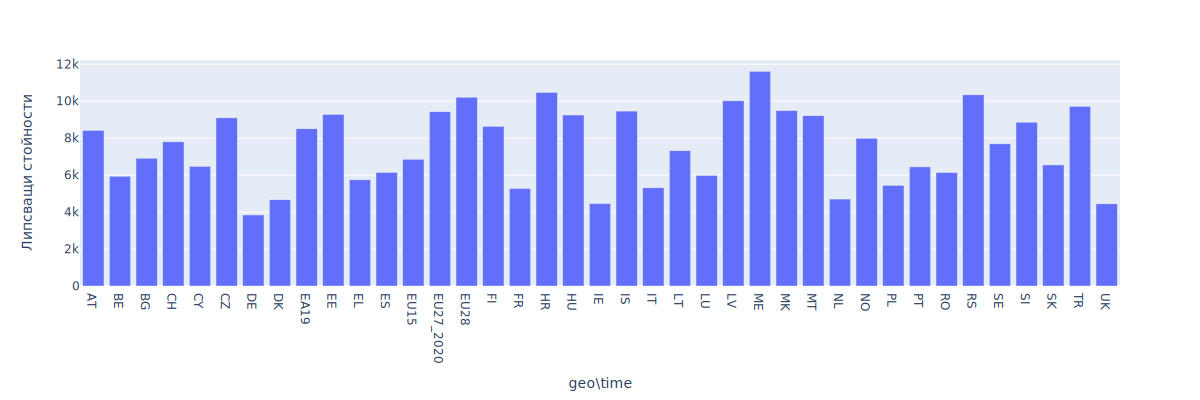

In [204]:
missing_rows(df_employment_example)

<p style="color:black; background-color:white; padding:5px;">
The results of the missing value function by rows showed that there were differences in the distribution of missing values. In the gender column, the most missing values are for female individuals. In the age column, the 15-19 age group and the over 65 age groups differ from the rest. In terms of education level, the NRP has the highest values. In the states, 4 states have missing values above 10,000. This suggests that there is some dependence and the missing values are not randomly distributed.</p>

---

<h3 style="color:black; background-color:white; padding:5px; padding-bottom:10px; margin-bottom:-10px">4. Missing values by rows in depth</h3>
<p style="color:black; background-color:white; padding:5px;">
If in the previous step the missing values were examined by rows, i.e. unique elements of the columns, then in this step this analysis goes deeper. The function looks for relationships between the missing values between the rows, i.e. the unique elements of the columns. In the present example, the relationship is between all columns 2 by 2. For each pair, in addition to the missing values, those that are above the average value for the combination will be presented. Only combinations with missing values above the mean will be visualized.
</p>

In [205]:
def missing_rows_deep (df):
    list1 = []
    for i in df.columns:
        if not df[i].dtype == "float" or df[i].dtype == "int":
            list1 += [i]
            
    for a in range (0, len(list1)):
        for b in range (0, len(list1)):
            if list1[a] == list1[b]:
                pass
            else:
                key = [list1[a],list1[b]]
                no_misising = df.groupby(key).apply(lambda x: x.notna().sum().sum()).to_frame(name=None).reset_index()
                missing_values = df.groupby(key).apply(lambda x: x.isna().sum().sum()).to_frame(name=None).reset_index()
                all_counts = no_misising + missing_values
                
                missing_values.rename({0:"missing"}, inplace=True, axis=1)
                print(missing_values)

                df_mask=missing_values["missing"] >= missing_values["missing"].mean()
                filtered_df = missing_values[df_mask]
                filtered_df["missing"]
                m = filtered_df["missing"]/all_counts[0]
                filtered_df["missing in %"] = m.map(lambda n: '{:,.2%}'.format(n))
                
                mean = missing_values["missing"].mean()

                print("----------------------------------------------")
                print (f" The avarage mean is: {mean:.2f}")

                print(filtered_df)
                print("-------------------------------------------------------------------")
                fig = px.bar(missing_values, x=(filtered_df.iloc[:,0]+ " / " +filtered_df.iloc[:,1]), y = filtered_df["missing"],  
                        color=filtered_df.iloc[:,3], labels={"missing": "Липсващи стойности"},width=1200, height=400)
                fig.show(renderer="svg")

   sex     age  missing
0    F  Y15-19     3995
1    F  Y15-24     3101
2    F  Y15-39     2937
3    F  Y15-59     2916
4    F  Y15-64     2915
..  ..     ...      ...
91   T  Y55-64     2880
92   T  Y60-64     3001
93   T  Y65-69     3438
94   T  Y65-74     3288
95   T  Y70-74     4049

[96 rows x 3 columns]
----------------------------------------------
 The avarage mean is: 3064.35
   sex     age  missing missing in %
0    F  Y15-19     3995       51.61%
1    F  Y15-24     3101       38.77%
6    F  Y20-24     3074       39.06%
28   F  Y60-64     3272       41.81%
29   F  Y65-69     4085       51.91%
30   F  Y65-74     3895       49.50%
31   F  Y70-74     5032       64.30%
32   M  Y15-19     3935       50.84%
33   M  Y15-24     3182       39.36%
38   M  Y20-24     3119       39.21%
60   M  Y60-64     3081       39.37%
61   M  Y65-69     3681       46.52%
62   M  Y65-74     3479       43.97%
63   M  Y70-74     4388       55.76%
64   T  Y15-19     3819       48.53%
65   T  Y15-24     3

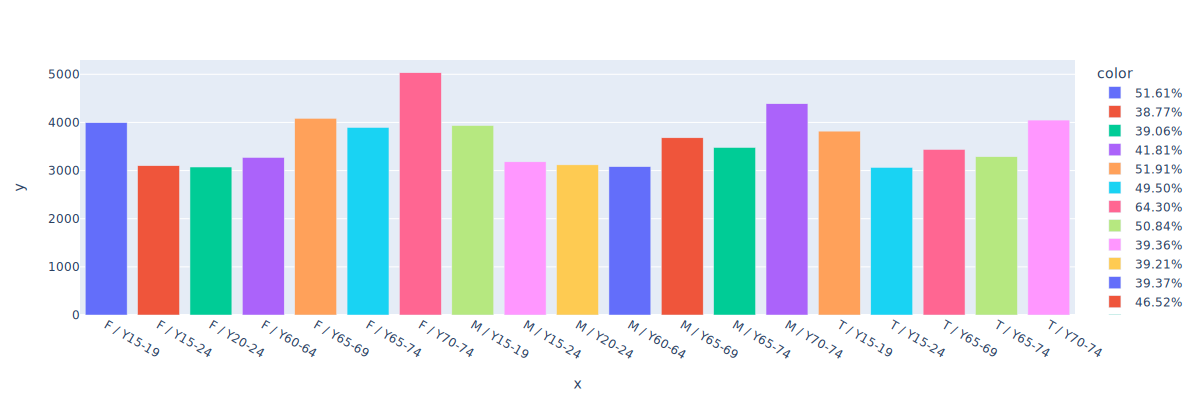

   sex isced11  missing
0    F   ED0-2    19824
1    F   ED3_4    19741
2    F   ED5-8    20540
3    F     NRP    25040
4    F   TOTAL    14970
5    M   ED0-2    19225
6    M   ED3_4    19166
7    M   ED5-8    19824
8    M     NRP    25016
9    M   TOTAL    14727
10   T   ED0-2    18798
11   T   ED3_4    18859
12   T   ED5-8    19478
13   T     NRP    24333
14   T   TOTAL    14637
----------------------------------------------
 The avarage mean is: 19611.87
   sex isced11  missing missing in %
0    F   ED0-2    19824       36.94%
1    F   ED3_4    19741       36.79%
2    F   ED5-8    20540       38.37%
3    F     NRP    25040       64.56%
7    M   ED5-8    19824       37.12%
8    M     NRP    25016       63.44%
13   T     NRP    24333       61.18%
-------------------------------------------------------------------


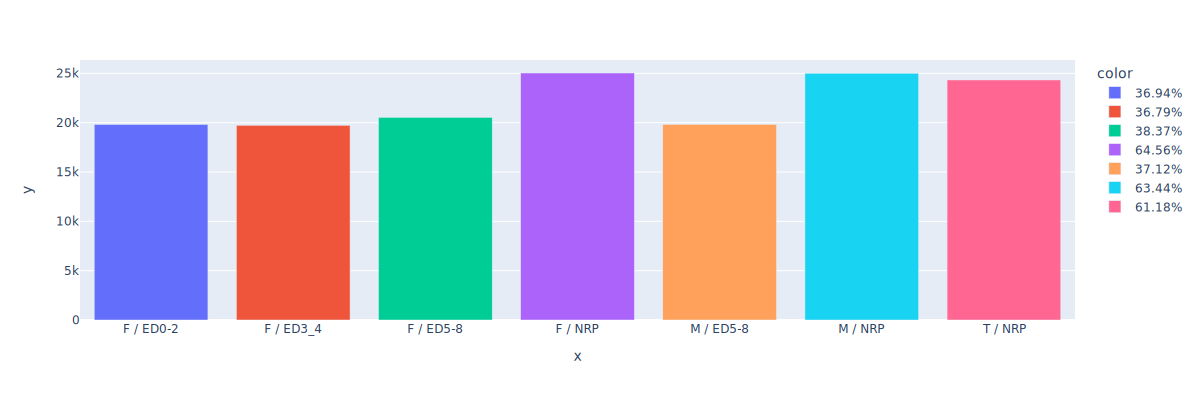

    sex geo\time  missing
0     F       AT     2874
1     F       BE     2074
2     F       BG     2365
3     F       CH     2664
4     F       CY     2238
..   ..      ...      ...
112   T       SE     2453
113   T       SI     2913
114   T       SK     2113
115   T       TR     3306
116   T       UK     1413

[117 rows x 3 columns]
----------------------------------------------
 The avarage mean is: 2514.34
    sex   geo\time  missing missing in %
0     F         AT     2874       42.30%
3     F         CH     2664       38.72%
5     F         CZ     3077       44.72%
8     F       EA19     2872       41.74%
9     F         EE     3067       46.32%
13    F  EU27_2020     3169       46.06%
14    F       EU28     3423       49.75%
15    F         FI     2939       42.72%
17    F         HR     3508       53.32%
18    F         HU     3137       45.60%
20    F         IS     3237       47.05%
22    F         LT     2554       44.32%
24    F         LV     3395       49.66%
25    F      

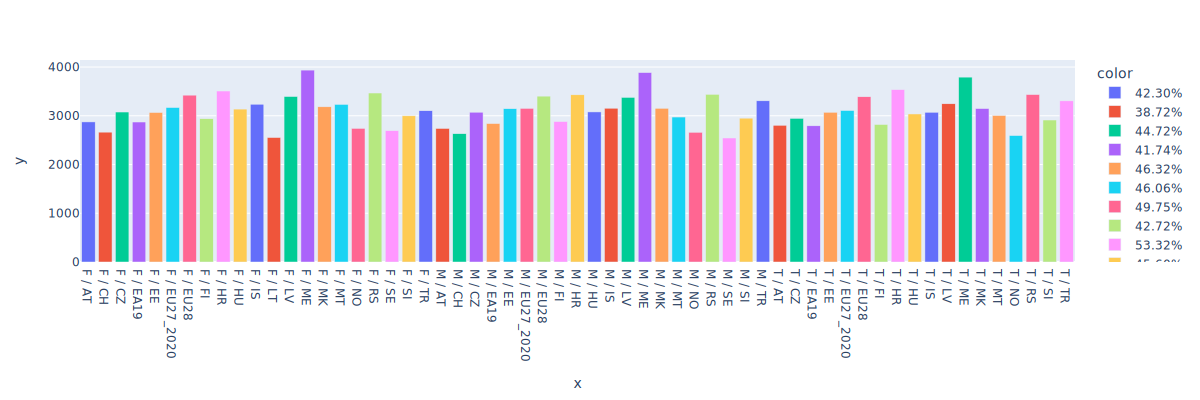

       age sex  missing
0   Y15-19   F     3995
1   Y15-19   M     3935
2   Y15-19   T     3819
3   Y15-24   F     3101
4   Y15-24   M     3182
..     ...  ..      ...
91  Y65-74   M     3479
92  Y65-74   T     3288
93  Y70-74   F     5032
94  Y70-74   M     4388
95  Y70-74   T     4049

[96 rows x 3 columns]
----------------------------------------------
 The avarage mean is: 3064.35
       age sex  missing missing in %
0   Y15-19   F     3995       51.61%
1   Y15-19   M     3935       50.84%
2   Y15-19   T     3819       48.53%
3   Y15-24   F     3101       38.77%
4   Y15-24   M     3182       39.36%
5   Y15-24   T     3065       37.91%
18  Y20-24   F     3074       39.06%
19  Y20-24   M     3119       39.21%
84  Y60-64   F     3272       41.81%
85  Y60-64   M     3081       39.37%
87  Y65-69   F     4085       51.91%
88  Y65-69   M     3681       46.52%
89  Y65-69   T     3438       43.45%
90  Y65-74   F     3895       49.50%
91  Y65-74   M     3479       43.97%
92  Y65-74   T     3

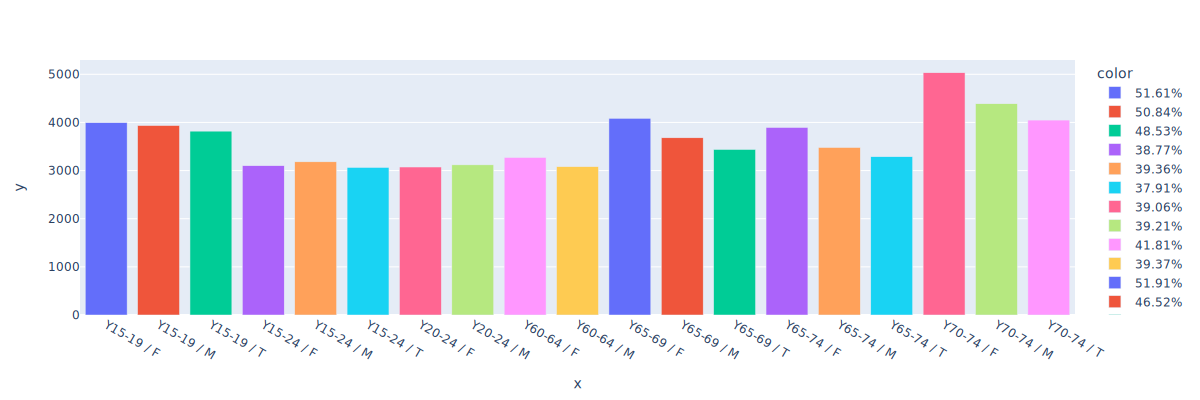

        age isced11  missing
0    Y15-19   ED0-2     1991
1    Y15-19   ED3_4     2031
2    Y15-19   ED5-8     3620
3    Y15-19     NRP     2690
4    Y15-19   TOTAL     1417
..      ...     ...      ...
155  Y70-74   ED0-2     2710
156  Y70-74   ED3_4     3050
157  Y70-74   ED5-8     3120
158  Y70-74     NRP     2767
159  Y70-74   TOTAL     1822

[160 rows x 3 columns]
----------------------------------------------
 The avarage mean is: 1838.61
        age isced11  missing missing in %
0    Y15-19   ED0-2     1991       39.57%
1    Y15-19   ED3_4     2031       40.37%
2    Y15-19   ED5-8     3620       80.18%
3    Y15-19     NRP     2690       71.91%
7    Y15-24   ED5-8     1850       36.77%
8    Y15-24     NRP     2667       65.98%
13   Y15-39     NRP     2443       60.44%
18   Y15-59     NRP     2379       58.86%
23   Y15-64     NRP     2372       58.68%
28   Y15-74     NRP     2366       58.54%
32   Y20-24   ED5-8     1852       36.81%
33   Y20-24     NRP     2434       66.59%
38   

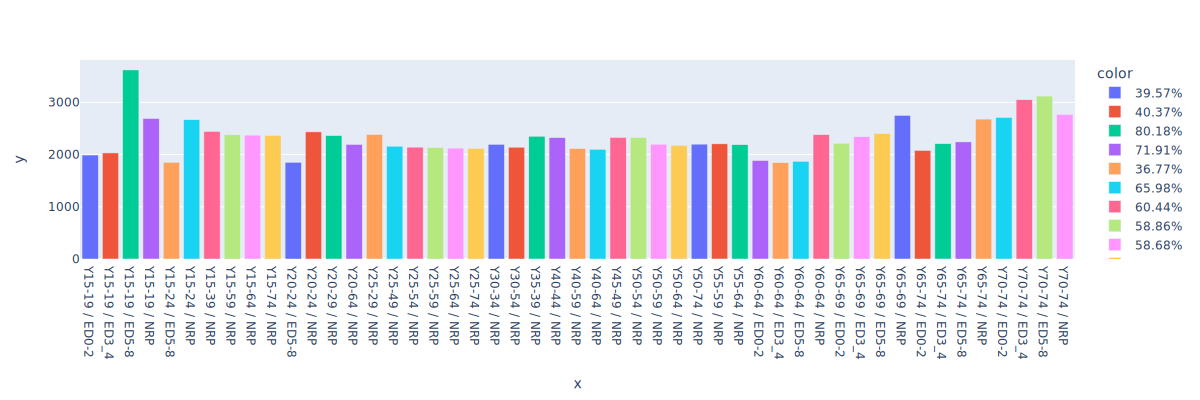

         age geo\time  missing
0     Y15-19       AT      332
1     Y15-19       BE      261
2     Y15-19       BG      316
3     Y15-19       CH      351
4     Y15-19       CY      291
...      ...      ...      ...
1243  Y70-74       SE      342
1244  Y70-74       SI      371
1245  Y70-74       SK      433
1246  Y70-74       TR      307
1247  Y70-74       UK      216

[1248 rows x 3 columns]
----------------------------------------------
 The avarage mean is: 235.72
         age geo\time  missing missing in %
0     Y15-19       AT      332       51.47%
1     Y15-19       BE      261       40.47%
2     Y15-19       BG      316       61.24%
3     Y15-19       CH      351       54.42%
4     Y15-19       CY      291       56.40%
...      ...      ...      ...          ...
1242  Y70-74       RS      352       68.22%
1243  Y70-74       SE      342       53.02%
1244  Y70-74       SI      371       57.52%
1245  Y70-74       SK      433       83.91%
1246  Y70-74       TR      307       59.50%

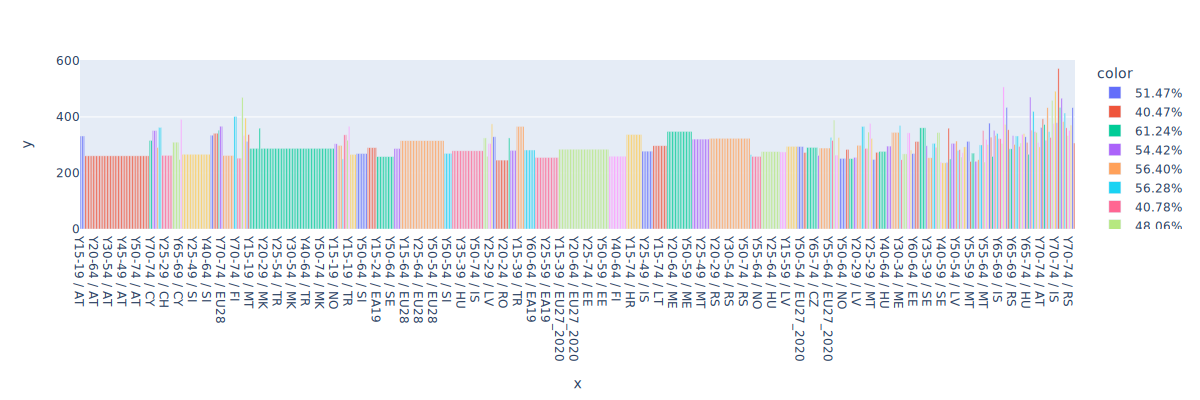

   isced11 sex  missing
0    ED0-2   F    19824
1    ED0-2   M    19225
2    ED0-2   T    18798
3    ED3_4   F    19741
4    ED3_4   M    19166
5    ED3_4   T    18859
6    ED5-8   F    20540
7    ED5-8   M    19824
8    ED5-8   T    19478
9      NRP   F    25040
10     NRP   M    25016
11     NRP   T    24333
12   TOTAL   F    14970
13   TOTAL   M    14727
14   TOTAL   T    14637
----------------------------------------------
 The avarage mean is: 19611.87
   isced11 sex  missing missing in %
0    ED0-2   F    19824       36.94%
3    ED3_4   F    19741       36.79%
6    ED5-8   F    20540       38.37%
7    ED5-8   M    19824       37.12%
9      NRP   F    25040       64.56%
10     NRP   M    25016       63.44%
11     NRP   T    24333       61.18%
-------------------------------------------------------------------


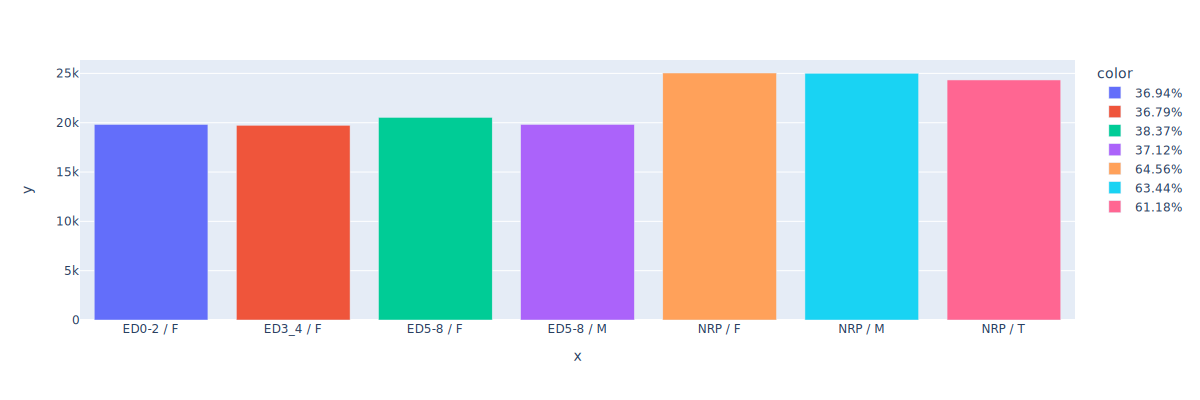

    isced11     age  missing
0     ED0-2  Y15-19     1991
1     ED0-2  Y15-24     1759
2     ED0-2  Y15-39     1710
3     ED0-2  Y15-59     1710
4     ED0-2  Y15-64     1710
..      ...     ...      ...
155   TOTAL  Y55-64     1362
156   TOTAL  Y60-64     1373
157   TOTAL  Y65-69     1493
158   TOTAL  Y65-74     1454
159   TOTAL  Y70-74     1822

[160 rows x 3 columns]
----------------------------------------------
 The avarage mean is: 1838.61
    isced11     age  missing missing in %
0     ED0-2  Y15-19     1991       39.57%
28    ED0-2  Y60-64     1886       37.49%
29    ED0-2  Y65-69     2216       44.05%
30    ED0-2  Y65-74     2079       41.32%
31    ED0-2  Y70-74     2710       53.87%
32    ED3_4  Y15-19     2031       40.37%
60    ED3_4  Y60-64     1844       36.65%
61    ED3_4  Y65-69     2342       46.55%
62    ED3_4  Y65-74     2208       43.89%
63    ED3_4  Y70-74     3050       60.62%
64    ED5-8  Y15-19     3620       80.18%
65    ED5-8  Y15-24     1850       36.77%
70   

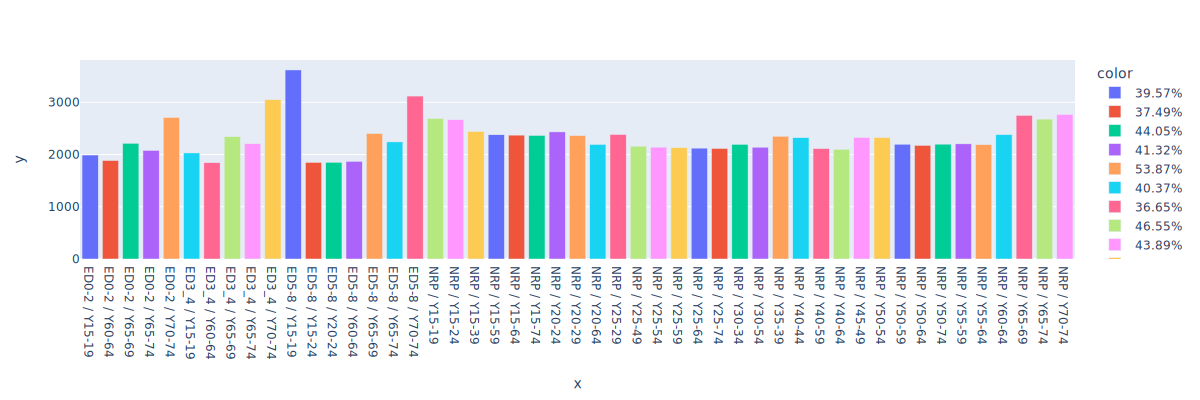

    isced11 geo\time  missing
0     ED0-2       AT     1197
1     ED0-2       BE      940
2     ED0-2       BG     1745
3     ED0-2       CH     1250
4     ED0-2       CY     1570
..      ...      ...      ...
183   TOTAL       SE     1159
184   TOTAL       SI     1248
185   TOTAL       SK     1506
186   TOTAL       TR     2304
187   TOTAL       UK      192

[188 rows x 3 columns]
----------------------------------------------
 The avarage mean is: 1564.78
    isced11   geo\time  missing missing in %
2     ED0-2         BG     1745       42.27%
4     ED0-2         CY     1570       38.03%
8     ED0-2       EA19     1632       39.53%
9     ED0-2         EE     1650       39.97%
13    ED0-2  EU27_2020     1824       44.19%
..      ...        ...      ...          ...
174   TOTAL         ME     2835       68.68%
175   TOTAL         MK     2306       55.86%
176   TOTAL         MT     1730       41.91%
182   TOTAL         RS     2593       62.81%
186   TOTAL         TR     2304       55.81%

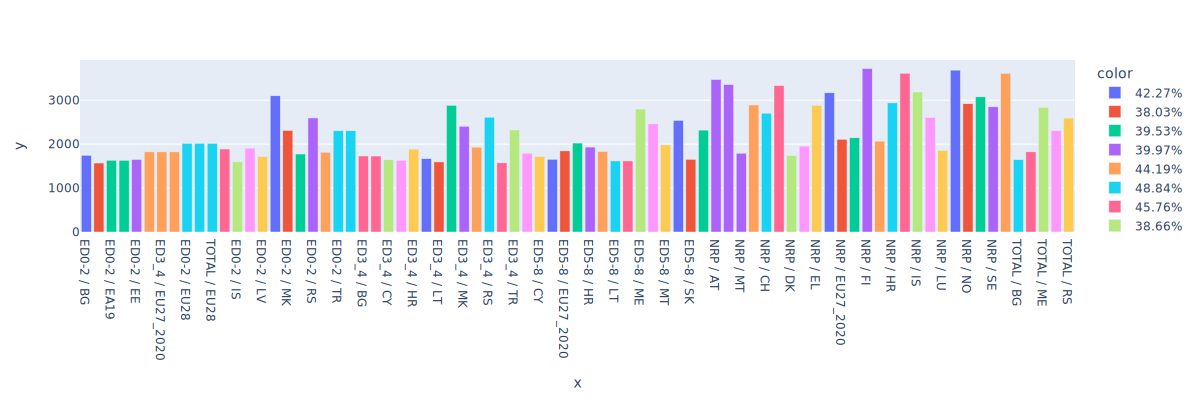

    geo\time sex  missing
0         AT   F     2874
1         AT   M     2740
2         AT   T     2805
3         BE   F     2074
4         BE   M     1954
..       ...  ..      ...
112       TR   M     3307
113       TR   T     3306
114       UK   F     1545
115       UK   M     1486
116       UK   T     1413

[117 rows x 3 columns]
----------------------------------------------
 The avarage mean is: 2514.34
      geo\time sex  missing missing in %
0           AT   F     2874       42.30%
1           AT   M     2740       40.85%
2           AT   T     2805       41.03%
9           CH   F     2664       38.72%
10          CH   M     2632       38.26%
15          CZ   F     3077       44.72%
16          CZ   M     3073       44.67%
17          CZ   T     2947       42.83%
24        EA19   F     2872       41.74%
25        EA19   M     2840       41.28%
26        EA19   T     2794       40.61%
27          EE   F     3067       46.32%
28          EE   M     3145       46.59%
29          E

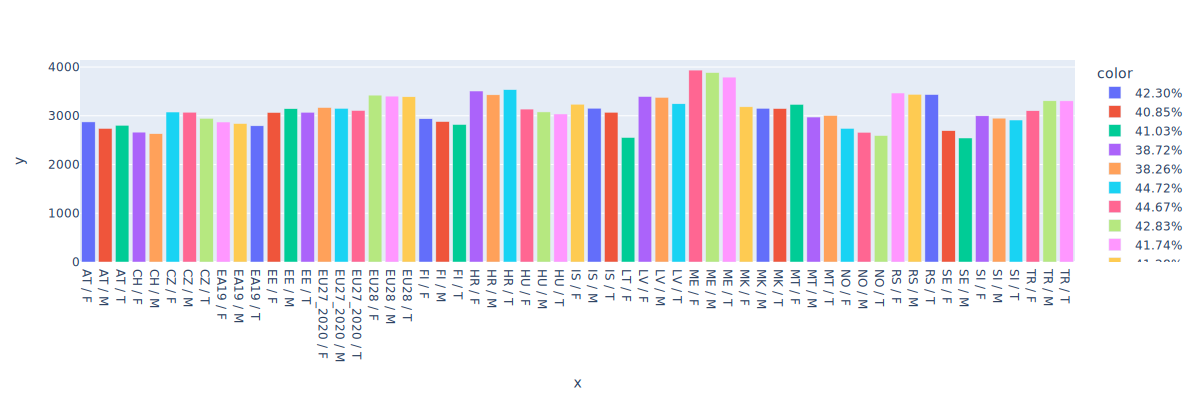

     geo\time     age  missing
0          AT  Y15-19      332
1          AT  Y15-24      266
2          AT  Y15-39      261
3          AT  Y15-59      261
4          AT  Y15-64      261
...       ...     ...      ...
1243       UK  Y55-64      138
1244       UK  Y60-64      154
1245       UK  Y65-69      178
1246       UK  Y65-74      165
1247       UK  Y70-74      216

[1248 rows x 3 columns]
----------------------------------------------
 The avarage mean is: 235.72
     geo\time     age  missing missing in %
0          AT  Y15-19      332       51.47%
1          AT  Y15-24      266       41.24%
2          AT  Y15-39      261       40.47%
3          AT  Y15-59      261       40.47%
4          AT  Y15-64      261       40.47%
...       ...     ...      ...          ...
1211       TR  Y55-64      288       55.81%
1212       TR  Y60-64      288       55.81%
1213       TR  Y65-69      295       57.17%
1214       TR  Y65-74      293       56.78%
1215       TR  Y70-74      307       59.50%

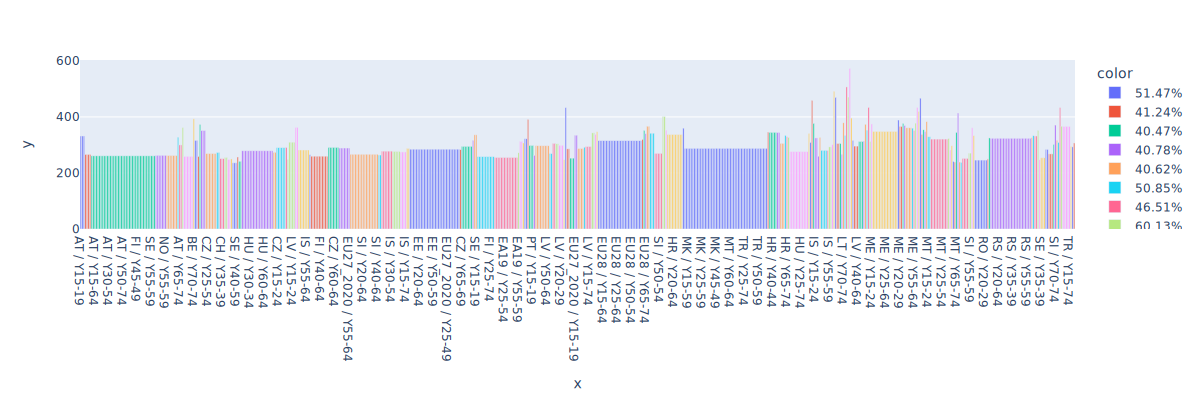

    geo\time isced11  missing
0         AT   ED0-2     1197
1         AT   ED3_4     1225
2         AT   ED5-8     1365
3         AT     NRP     3471
4         AT   TOTAL     1161
..       ...     ...      ...
183       UK   ED0-2     1152
184       UK   ED3_4     1163
185       UK   ED5-8     1175
186       UK     NRP      762
187       UK   TOTAL      192

[188 rows x 3 columns]
----------------------------------------------
 The avarage mean is: 1564.78
    geo\time isced11  missing missing in %
3         AT     NRP     3471       90.70%
8         BE     NRP     2890       70.01%
10        BG   ED0-2     1745       42.27%
11        BG   ED3_4     1730       41.91%
12        BG   ED5-8     1793       43.44%
..       ...     ...      ...          ...
176       SK   ED5-8     1653       40.04%
178       TR   ED0-2     2304       55.81%
179       TR   ED3_4     2321       56.23%
180       TR   ED5-8     2319       56.18%
182       TR   TOTAL     2304       55.81%

[79 rows x 4 columns]


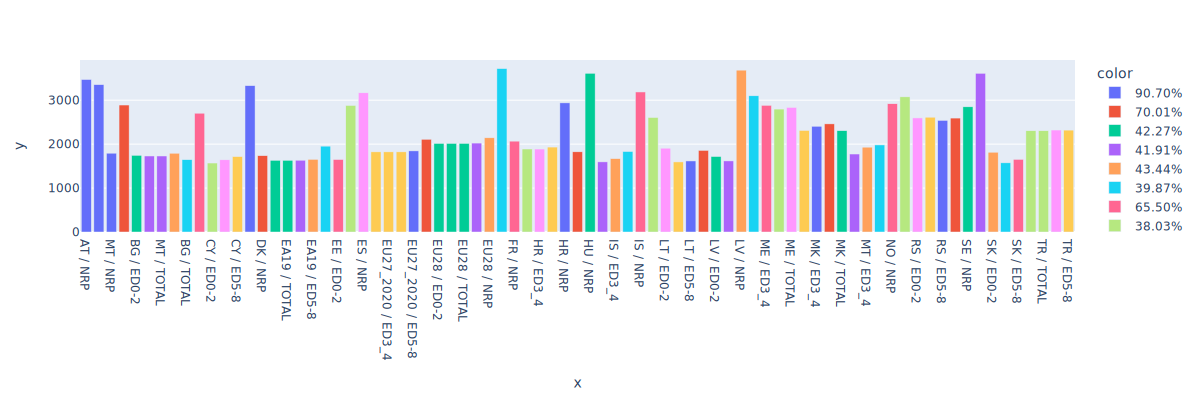

In [206]:
missing_rows_deep(df_employment_example)

<ul style="color:black; background-color:white; padding:5px; margin-bottom:-10px">The results of the in-depth missing values analysis show that:
</ul>
<li style="color:black; background-color:white; padding:5px">in combination "sex" - "age", the values are highest in the extreme age groups without any relation to gender. In these combinations, missing values are about 50% of all cases;</li>
<li style="color:black; background-color:white; padding:5px">in combination "sex" - "education" it can be seen that the highest percentage of missing values, over 60%, has the NRP, regardless of gender;</li>
<li style="color:black; background-color:white; padding:5px">in combination "sex" - "countries", the inferences about missing values for certain countries are confirmed and a connection with gender is excluded;</li>
<li style="color:black; background-color:white; padding:5px">in combination "age" - "education" it can be seen that combining the extreme age groups with the NRP, the percentage of missing values exceeds 60%, and with certain combinations "70-74" it is even 80%. Of interest is the second highest value of 80.18% in the age group 15-19 and level of education ED5-8. The explanation lies precisely in the impossibility of combining such an age group with such a level of education;</li>

---

<h3 style="color:black; background-color:white; padding:5px; padding-bottom:10px; margin-bottom:-10px">5. Check for outliers in missing values</h3>
<p style="color:black; background-color:white; padding:5px;">
It became clear that in certain education levels, age groups and countries, missing values exceeded the average level of missing values. Therefore, we will now use an outlier detection toolkit approach to indicate those that have extreme missing values.</p>

In [212]:
def missing_rows_deep_outliers (df):
    list1 = []
    for i in df.columns:
        if not df[i].dtype == "float" or df[i].dtype == "int":
            list1 += [i]
            
    for a in range (0, len(list1)):
        for b in range (0, len(list1)):
            if list1[a] == list1[b]:
                pass
            else:
                key = [list1[a],list1[b]]
                no_misising = df.groupby(key).apply(lambda x: x.notna().sum().sum()).to_frame(name=None).reset_index()
                missing_values = df.groupby(key).apply(lambda x: x.isna().sum().sum()).to_frame(name=None).reset_index()
                all_counts = no_misising + missing_values
                missing_values.rename({0:"missing"}, inplace=True, axis=1)
                
                q1=missing_values.quantile(0.25)
                q3=missing_values.quantile(0.75)
                IQR=q3-q1
                outliers = missing_values[(missing_values>(q3+1.5*IQR))]
                
                df_mask=missing_values["missing"] >= outliers["missing"]
                filtered_df = missing_values[df_mask]
                filtered_df["missing"]
                m = filtered_df["missing"]/all_counts[0]
                filtered_df["missing in %"] = m.map(lambda n: '{:,.2%}'.format(n))
                
                if filtered_df.isnull().values.any() == True:
                    pass
                else:
                    print("----------------------------------------------")
                    print (tabulate(filtered_df, headers = 'keys', tablefmt = 'psql'))
                    print("-------------------------------------------------------------------")

                    fig = px.box(missing_values, y=missing_values["missing"],width=700, height=400)
                    fig.show(renderer="svg")

----------------------------------------------
+----+-------+--------+-----------+----------------+
|    | sex   | age    |   missing | missing in %   |
|----+-------+--------+-----------+----------------|
|  0 | F     | Y15-19 |      3995 | 51.61%         |
| 28 | F     | Y60-64 |      3272 | 41.81%         |
| 29 | F     | Y65-69 |      4085 | 51.91%         |
| 30 | F     | Y65-74 |      3895 | 49.50%         |
| 31 | F     | Y70-74 |      5032 | 64.30%         |
| 32 | M     | Y15-19 |      3935 | 50.84%         |
| 61 | M     | Y65-69 |      3681 | 46.52%         |
| 62 | M     | Y65-74 |      3479 | 43.97%         |
| 63 | M     | Y70-74 |      4388 | 55.76%         |
| 64 | T     | Y15-19 |      3819 | 48.53%         |
| 93 | T     | Y65-69 |      3438 | 43.45%         |
| 94 | T     | Y65-74 |      3288 | 41.56%         |
| 95 | T     | Y70-74 |      4049 | 51.46%         |
+----+-------+--------+-----------+----------------+
----------------------------------------------------

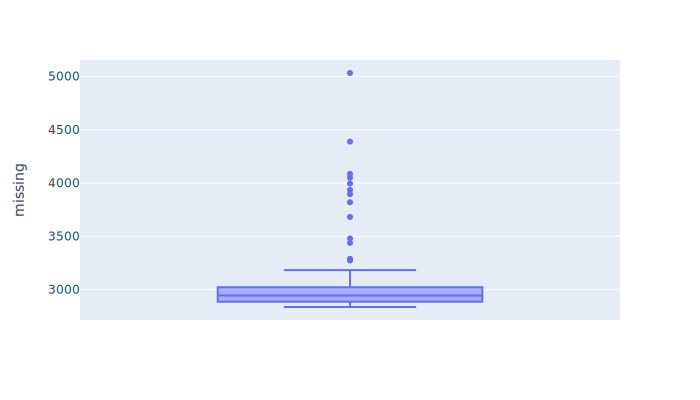

----------------------------------------------
+----+-------+-----------+-----------+----------------+
|    | sex   | isced11   |   missing | missing in %   |
|----+-------+-----------+-----------+----------------|
|  3 | F     | NRP       |     25040 | 64.56%         |
|  8 | M     | NRP       |     25016 | 63.44%         |
| 13 | T     | NRP       |     24333 | 61.18%         |
+----+-------+-----------+-----------+----------------+
-------------------------------------------------------------------


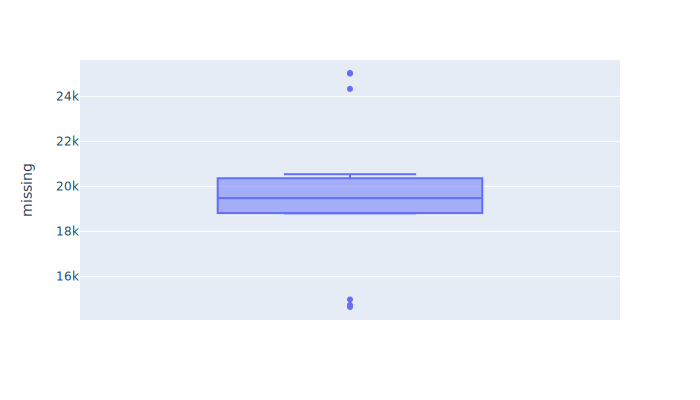

----------------------------------------------
+----+--------+-------+-----------+----------------+
|    | age    | sex   |   missing | missing in %   |
|----+--------+-------+-----------+----------------|
|  0 | Y15-19 | F     |      3995 | 51.61%         |
|  1 | Y15-19 | M     |      3935 | 50.84%         |
|  2 | Y15-19 | T     |      3819 | 48.53%         |
| 84 | Y60-64 | F     |      3272 | 41.81%         |
| 87 | Y65-69 | F     |      4085 | 51.91%         |
| 88 | Y65-69 | M     |      3681 | 46.52%         |
| 89 | Y65-69 | T     |      3438 | 43.45%         |
| 90 | Y65-74 | F     |      3895 | 49.50%         |
| 91 | Y65-74 | M     |      3479 | 43.97%         |
| 92 | Y65-74 | T     |      3288 | 41.56%         |
| 93 | Y70-74 | F     |      5032 | 64.30%         |
| 94 | Y70-74 | M     |      4388 | 55.76%         |
| 95 | Y70-74 | T     |      4049 | 51.46%         |
+----+--------+-------+-----------+----------------+
----------------------------------------------------

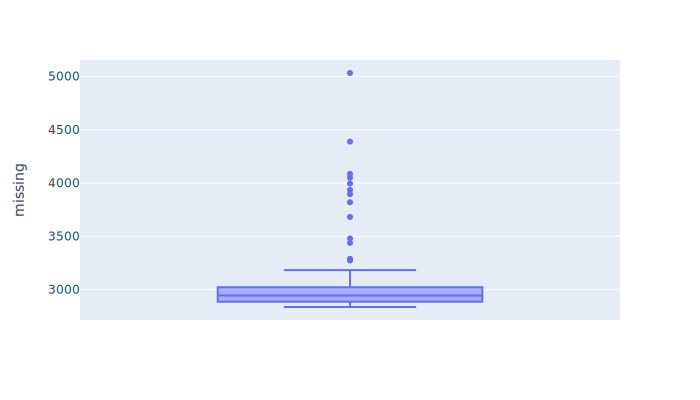

----------------------------------------------
+-----+--------+-----------+-----------+----------------+
|     | age    | isced11   |   missing | missing in %   |
|-----+--------+-----------+-----------+----------------|
|   2 | Y15-19 | ED5-8     |      3620 | 80.18%         |
| 148 | Y65-69 | NRP       |      2750 | 77.05%         |
| 155 | Y70-74 | ED0-2     |      2710 | 53.87%         |
| 156 | Y70-74 | ED3_4     |      3050 | 60.62%         |
| 157 | Y70-74 | ED5-8     |      3120 | 62.02%         |
| 158 | Y70-74 | NRP       |      2767 | 80.44%         |
+-----+--------+-----------+-----------+----------------+
-------------------------------------------------------------------


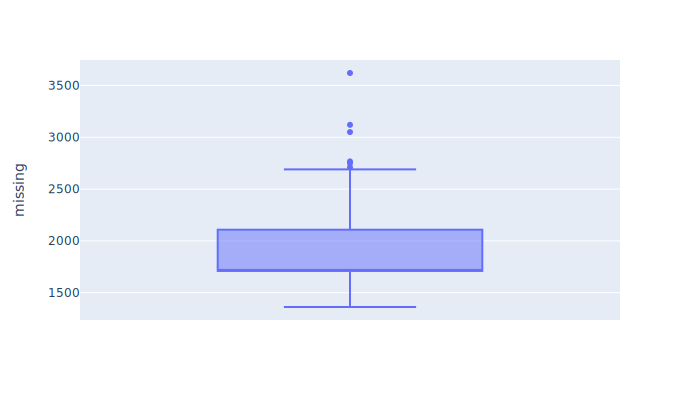

----------------------------------------------
+------+--------+------------+-----------+----------------+
|      | age    | geo\time   |   missing | missing in %   |
|------+--------+------------+-----------+----------------|
|   22 | Y15-19 | LT         |       470 | 72.87%         |
| 1154 | Y65-69 | LU         |       507 | 78.60%         |
| 1193 | Y65-74 | LU         |       471 | 73.02%         |
| 1229 | Y70-74 | IS         |       492 | 76.28%         |
| 1232 | Y70-74 | LU         |       573 | 88.84%         |
| 1234 | Y70-74 | ME         |       467 | 90.50%         |
+------+--------+------------+-----------+----------------+
-------------------------------------------------------------------


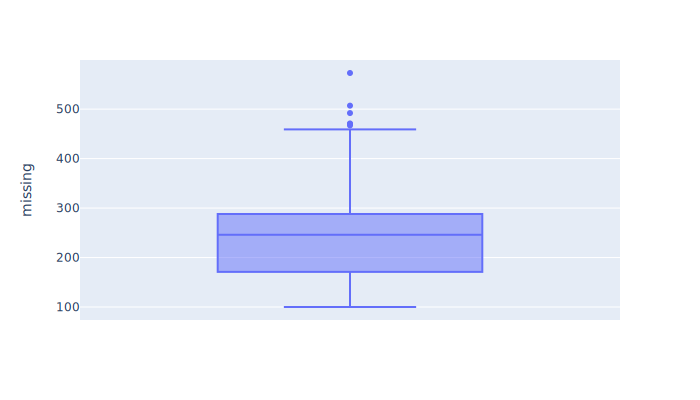

----------------------------------------------
+----+-----------+-------+-----------+----------------+
|    | isced11   | sex   |   missing | missing in %   |
|----+-----------+-------+-----------+----------------|
|  9 | NRP       | F     |     25040 | 64.56%         |
| 10 | NRP       | M     |     25016 | 63.44%         |
| 11 | NRP       | T     |     24333 | 61.18%         |
+----+-----------+-------+-----------+----------------+
-------------------------------------------------------------------


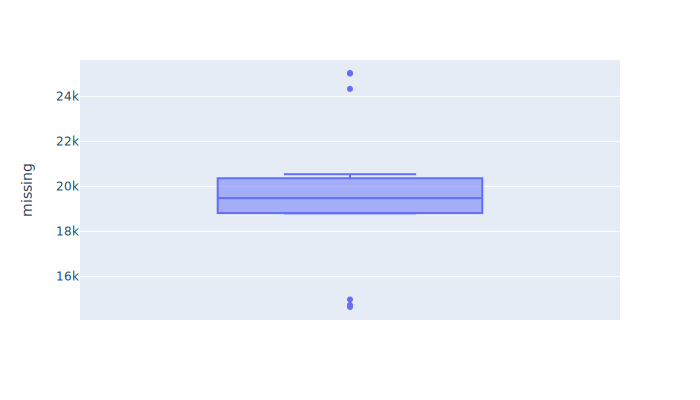

----------------------------------------------
+-----+-----------+--------+-----------+----------------+
|     | isced11   | age    |   missing | missing in %   |
|-----+-----------+--------+-----------+----------------|
|  31 | ED0-2     | Y70-74 |      2710 | 53.87%         |
|  63 | ED3_4     | Y70-74 |      3050 | 60.62%         |
|  64 | ED5-8     | Y15-19 |      3620 | 80.18%         |
|  95 | ED5-8     | Y70-74 |      3120 | 62.02%         |
| 125 | NRP       | Y65-69 |      2750 | 77.05%         |
| 127 | NRP       | Y70-74 |      2767 | 80.44%         |
+-----+-----------+--------+-----------+----------------+
-------------------------------------------------------------------


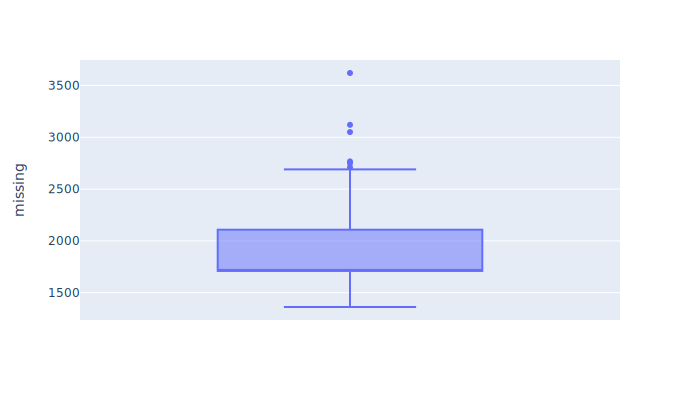

----------------------------------------------
+-----+-----------+------------+-----------+----------------+
|     | isced11   | geo\time   |   missing | missing in %   |
|-----+-----------+------------+-----------+----------------|
|  25 | ED0-2     | ME         |      3100 | 75.10%         |
| 117 | NRP       | AT         |      3471 | 90.70%         |
| 120 | NRP       | CZ         |      3331 | 80.69%         |
| 124 | NRP       | EE         |      3354 | 90.70%         |
| 126 | NRP       | ES         |      3168 | 76.74%         |
| 130 | NRP       | FI         |      3719 | 90.09%         |
| 132 | NRP       | HR         |      2939 | 87.63%         |
| 133 | NRP       | HU         |      3613 | 87.52%         |
| 135 | NRP       | IS         |      3187 | 77.20%         |
| 139 | NRP       | LV         |      3684 | 90.18%         |
| 143 | NRP       | PT         |      3076 | 74.52%         |
| 146 | NRP       | SI         |      3612 | 87.50%         |
+-----+-----------+----

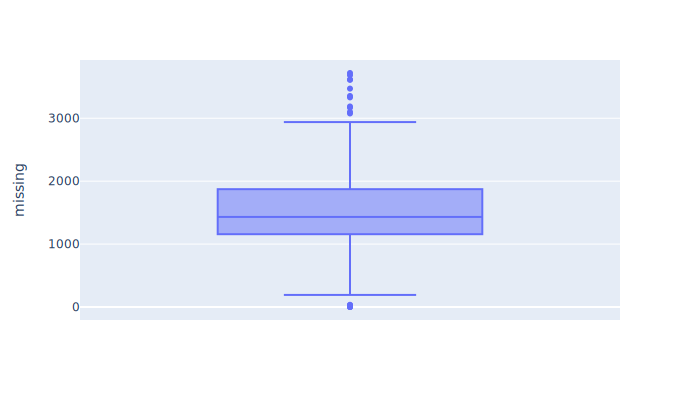

----------------------------------------------
+-----+------------+--------+-----------+----------------+
|     | geo\time   | age    |   missing | missing in %   |
|-----+------------+--------+-----------+----------------|
| 671 | IS         | Y70-74 |       492 | 76.28%         |
| 704 | LT         | Y15-19 |       470 | 72.87%         |
| 765 | LU         | Y65-69 |       507 | 78.60%         |
| 766 | LU         | Y65-74 |       471 | 73.02%         |
| 767 | LU         | Y70-74 |       573 | 88.84%         |
| 831 | ME         | Y70-74 |       467 | 90.50%         |
+-----+------------+--------+-----------+----------------+
-------------------------------------------------------------------


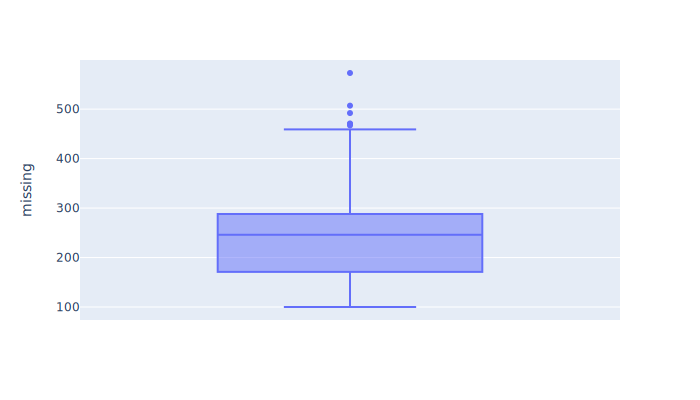

----------------------------------------------
+-----+------------+-----------+-----------+----------------+
|     | geo\time   | isced11   |   missing | missing in %   |
|-----+------------+-----------+-----------+----------------|
|   3 | AT         | NRP       |      3471 | 90.70%         |
|  26 | CZ         | NRP       |      3331 | 80.69%         |
|  46 | EE         | NRP       |      3354 | 90.70%         |
|  56 | ES         | NRP       |      3168 | 76.74%         |
|  76 | FI         | NRP       |      3719 | 90.09%         |
|  86 | HR         | NRP       |      2939 | 87.63%         |
|  91 | HU         | NRP       |      3613 | 87.52%         |
| 101 | IS         | NRP       |      3187 | 77.20%         |
| 121 | LV         | NRP       |      3684 | 90.18%         |
| 123 | ME         | ED0-2     |      3100 | 75.10%         |
| 153 | PT         | NRP       |      3076 | 74.52%         |
| 172 | SI         | NRP       |      3612 | 87.50%         |
+-----+------------+---

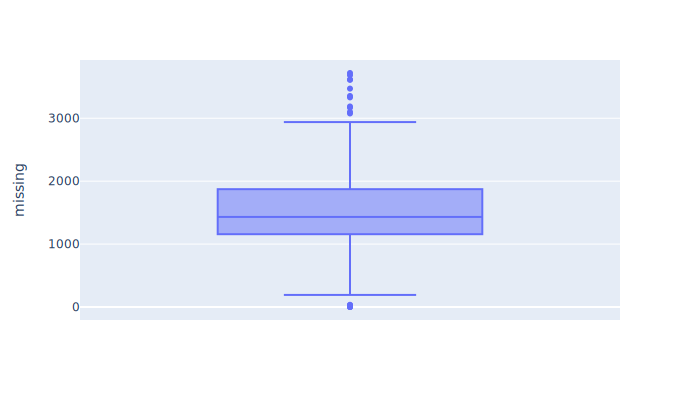

In [213]:
missing_rows_deep_outliers(df_employment_example)

<p style="color:black; background-color:white; padding:5px;">
The results of applying the upper quantile as a filter for the combinations with extreme missing values refines the results up to this point. It also visualizes them very well and their super missing value can be clearly seen.</p>

---

<h3 style="color:black; background-color:white; padding:5px; padding-bottom:10px; margin-bottom:-10px">6. Missing values using filter</h3>
<p style="color:black; background-color:white; padding:5px;">
Another interesting approach is to filter the rows by the number of missing values in all or most of the columns. This will be checked by two functions, one checks for missing values in all years and the other by a specified threshold</p>

In [20]:
def missing_rows_all (df):
    results = df.select_dtypes(include=["float"])
    len_results = len(results.columns)
    len_results_null = df.loc[df.isnull().sum(1)==len_results]
    
    observations_part, features_part = len_results_null.shape
    observations, features = df.shape
    obesrvation_relative = 100/(observations/observations_part)
    
    print(f"The database has {len_results} columns(features) with float type datas")
    print(f"The folowing {observations_part} rows dont have any data on any of that columns (features):")
    print(f"The part of dataframe with filtered missing values is {obesrvation_relative:.2f} % of the whole database")

    return(len_results_null)

In [21]:
missing_rows_all(df_employment_example)

The database has 39 columns(features) with float type datas
The folowing 713 rows dont have any data on any of that columns (features):
The part of dataframe with filtered missing values is 4.03 % of the whole database


,sex,age,isced11,geo\time,2021,2020,2019,2018,2017,2016,...,1992,1991,1990,1989,1988,1987,1986,1985,1984,1983
25,F,Y15-19,ED0-2,ME,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64,F,Y15-19,ED3_4,ME,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79,F,Y15-19,ED5-8,BE,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80,F,Y15-19,ED5-8,BG,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81,F,Y15-19,ED5-8,CH,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17649,T,Y70-74,NRP,EE,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17653,T,Y70-74,NRP,EU27_2020,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17655,T,Y70-74,NRP,FI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17662,T,Y70-74,NRP,LV,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
def missing_part (df, percent):
    results = df.select_dtypes(include=["float"])
    len_results = len(results.columns)
    number = len_results*(percent/100)
    len_results_null = df.loc[df.isnull().sum(1)>=number]
    
    observations_part, features_part = len_results_null.shape
    observations, features = df.shape
    obesrvation_relative = 100/(observations/observations_part)
    
    print(f"The database has {len_results} columns(features) with float type datas")
    print(f"The folowing {observations_part} rows have {number:.2f} percent missing values")
    print(f"The part of dataframe with filtered missing values is {obesrvation_relative:.2f} % of the whole database")

    return(len_results_null)

In [23]:
missing_part(df_employment_example, 70)

The database has 39 columns(features) with float type datas
The folowing 2303 rows have 27.30 percent missing values
The part of dataframe with filtered missing values is 13.01 % of the whole database


,sex,age,isced11,geo\time,2021,2020,2019,2018,2017,2016,...,1992,1991,1990,1989,1988,1987,1986,1985,1984,1983
2,F,Y15-19,ED0-2,BG,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,F,Y15-19,ED0-2,CY,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,F,Y15-19,ED0-2,HR,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,F,Y15-19,ED0-2,LT,2.5,2.6,3.9,3.2,2.5,2.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,F,Y15-19,ED0-2,ME,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17665,T,Y70-74,NRP,PT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,13.9,11.7,12.3,13.6,13.5,11.0,NaN,NaN,NaN
17666,T,Y70-74,NRP,SE,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17667,T,Y70-74,NRP,SI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17692,T,Y70-74,TOTAL,LU,5.2,NaN,NaN,NaN,2.5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5


<p style="color:black; background-color:white; padding:5px;">The results show that more than 13% of the rows in a database have more than 70% missing values. And over 4% do not have any values by year.</p>

---

<h3 style="color:black; background-color:white; padding:5px; padding-bottom:10px; margin-bottom:-10px">7. Visualization of missing values</h3>
<p style="color:black; background-color:white; padding:5px;">
To visualize and understand the missing data from a different perspective, several basic visualization methods including the Missingno library tools are indicated.</p>

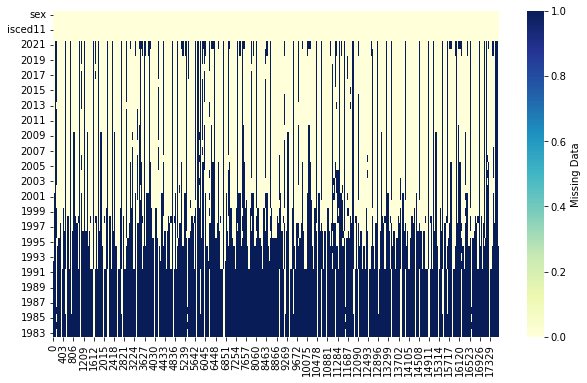

In [24]:
plt.figure(figsize=(10,6))
sns.heatmap(df_employment_example.isna().transpose(), cmap="YlGnBu", cbar_kws={'label': 'Missing Data'})
#plt.savefig("visualizing_missing_data_with_heatmap_Seaborn_Python.png", dpi=200)
plt.show()

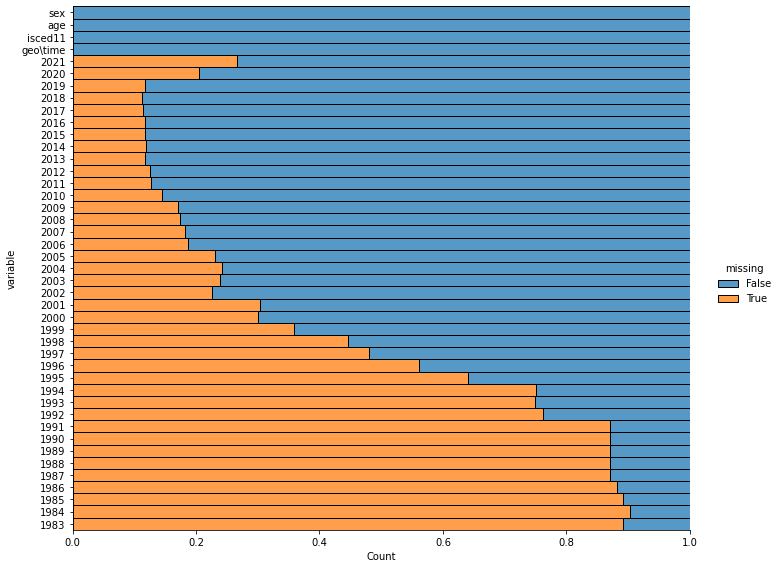

In [25]:
sns.displot(
    data=df_employment_example.isna().melt(value_name="missing"), 
    y="variable",
    hue="missing",
    multiple="fill",
    height = 8,
    aspect=1.25
)

<AxesSubplot:>

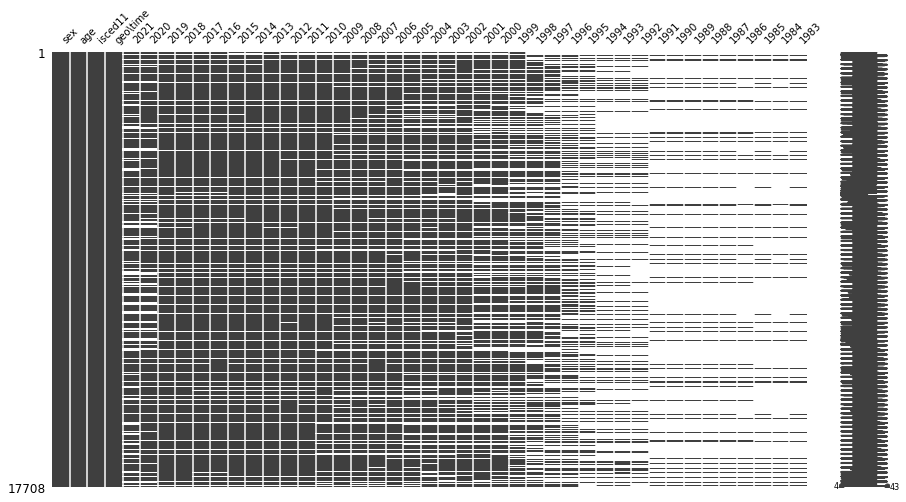

In [26]:
msno.matrix(df_employment_example, figsize=(15, 8), fontsize=10)

<AxesSubplot:>

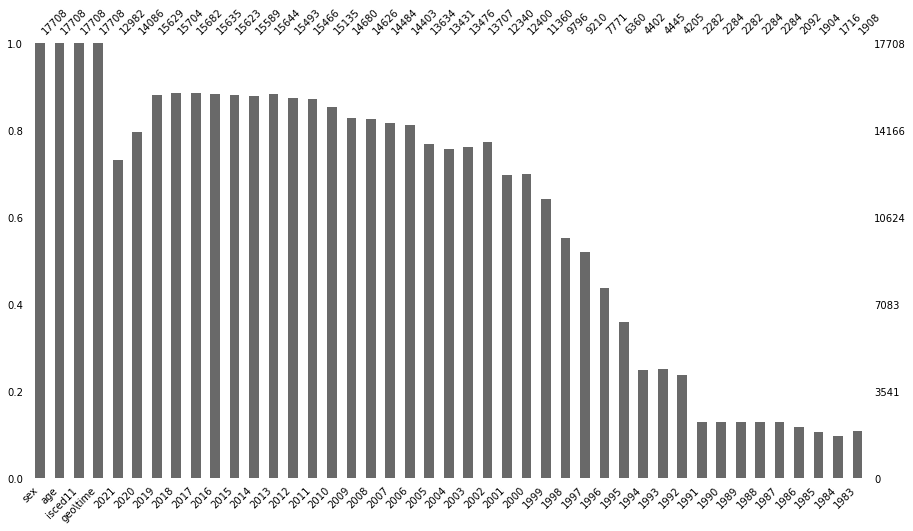

In [27]:
msno.bar(df_employment_example, figsize=(15, 8), fontsize=10)

<p style="color:black; background-color:white; padding:5px;">The graphs show very well both the number of missing values by columns and also by rows. Rows with completely missing or mostly missing values are seen as solid lines.</p> 

<AxesSubplot:>

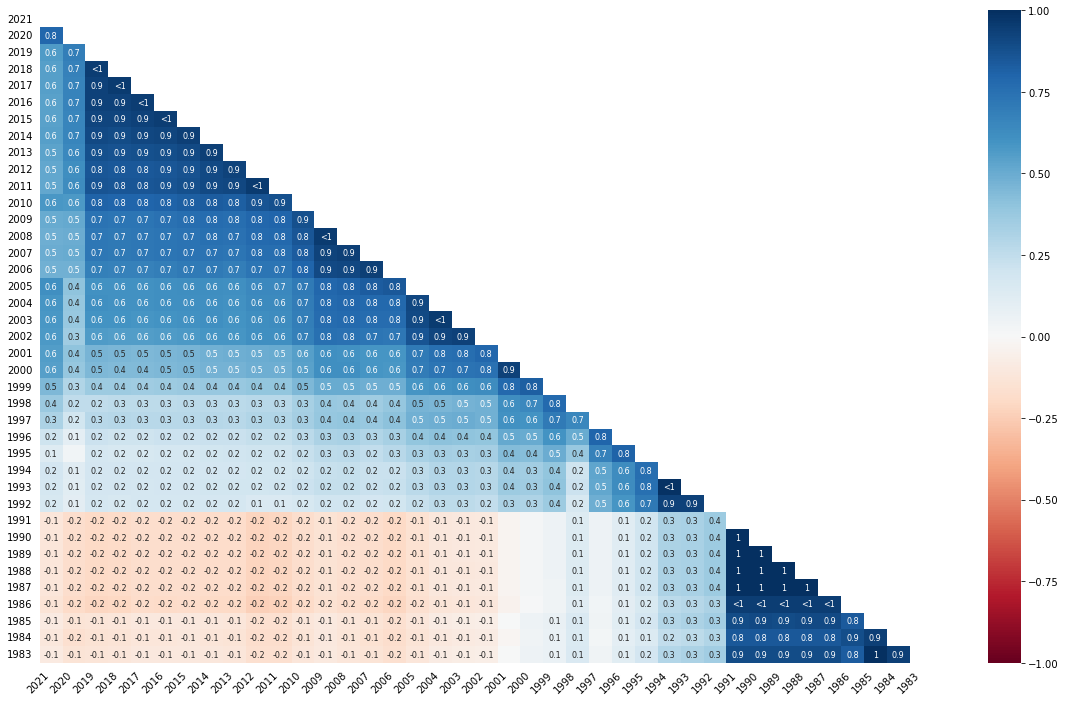

In [28]:
msno.heatmap(df_employment_example, fontsize=10)

<p style="color:black; background-color:white; padding:5px;">The hheatmap clearly shows the correlation relationship between the missing value columns. The most distinct is the period 1983 - 1991 and 2001 - 2021, where the relationship is minimal.</p>

<AxesSubplot:>

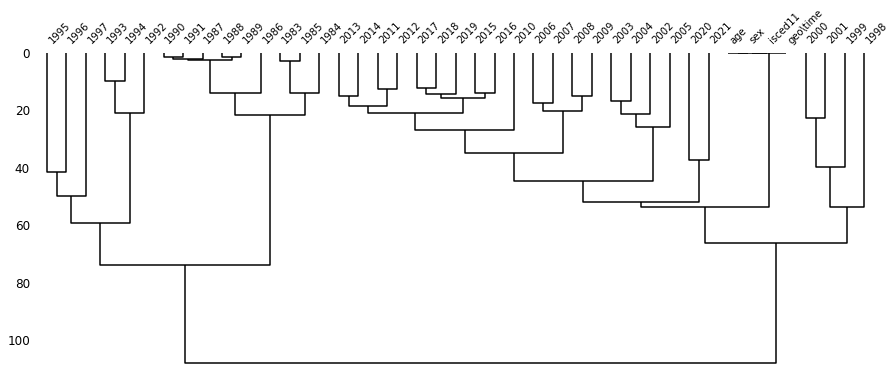

In [29]:
msno.dendrogram(df_employment_example, figsize=(15, 6), fontsize=10)

<p style="color:black; background-color:white; padding:5px;">The dendogram shows very well the closeness of certain years in terms of the missing values in them. Two large groups of missing values can be distinguished, two clusters, one containing the years from 1983 to 1997 and the other from 1998 to 2021.</p>

---

<h3 style="color:black; background-color:white; padding:5px; padding-bottom:10px; margin-bottom:-10px">8. Visualization of missing values by rows (unique column values) in depth</h3>
<p style="color:black; background-color:white; padding:5px;">
In point 4, we presented the missing values by column or each unique element of the columns how many total missing values there are. Here the approach is similar. Again, the missing values for each unique element of the columns are summed, but instead of as a total value, as a total value for each year. In this way, it is possible to visualize the summed missing values unique items by heatmap.</p>

In [30]:
def missing_inside (df):
    for i in df.columns:
        if not df[i].dtype == "float" or df[i].dtype == "int":
            count = df.groupby(by=i)[df.columns].count()
            missing = df.set_index(i).isna().groupby(i).sum()
            
            df_percent = 100/((count + missing)/missing)
            df_percent = df_percent.round(2)
            df_percent = df_percent[df_percent.columns[::-1]]
            print("----------------------------------------------------------------------------------------")
            display(df_percent)
            plt.figure(figsize=(10,6))
            sns.heatmap(df_percent.transpose(), cmap="YlGnBu", cbar_kws={'label': 'Missing Data'})
            plt.show()
        else:
            pass

----------------------------------------------------------------------------------------


,sex,isced11,geo\time,age,2021,2020,2019,2018,2017,2016,...,1992,1991,1990,1989,1988,1987,1986,1985,1984,1983
sex,,,,,,,,,,,,,,,,,,,,,
F,NaN,0.0,0.0,0.0,28.11,21.71,13.10,12.44,12.60,12.88,...,76.69,87.17,87.17,87.17,87.13,87.17,88.22,89.31,90.36,89.31
M,NaN,0.0,0.0,0.0,26.66,20.77,11.71,11.30,11.40,11.71,...,76.11,87.13,87.09,87.09,87.09,87.09,88.18,89.23,90.28,89.19
T,NaN,0.0,0.0,0.0,25.30,18.89,10.42,10.21,10.33,10.53,...,75.96,87.05,87.05,87.08,87.08,87.05,88.16,89.21,90.29,89.18


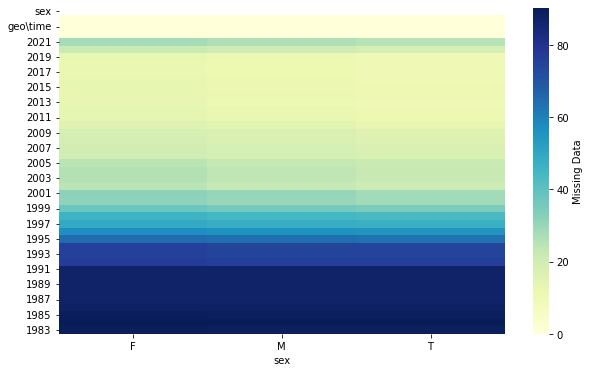

----------------------------------------------------------------------------------------


,sex,isced11,geo\time,age,2021,2020,2019,2018,2017,2016,...,1992,1991,1990,1989,1988,1987,1986,1985,1984,1983
age,,,,,,,,,,,,,,,,,,,,,
Y15-19,0.0,0.0,0.0,NaN,49.17,44.20,32.04,30.57,32.04,31.86,...,79.37,86.74,86.74,86.74,86.74,86.74,87.85,88.95,90.06,88.95
Y15-24,0.0,0.0,0.0,NaN,27.94,22.60,12.46,11.92,11.21,12.28,...,76.69,87.19,87.19,87.19,87.19,87.19,88.26,89.32,90.39,89.32
Y15-39,0.0,0.0,0.0,NaN,24.02,18.15,9.79,9.61,9.79,9.79,...,75.62,87.19,87.19,87.19,87.19,87.19,88.26,89.32,90.39,89.32
Y15-59,0.0,0.0,0.0,NaN,23.67,17.26,9.61,9.25,9.43,9.61,...,75.44,87.19,87.19,87.19,87.19,87.19,88.26,89.32,90.39,89.32
Y15-64,0.0,0.0,0.0,NaN,23.49,17.26,9.61,9.25,9.43,9.61,...,75.44,87.19,87.19,87.19,87.19,87.19,88.26,89.32,90.39,89.32
Y15-74,0.0,0.0,0.0,NaN,23.49,17.26,9.61,9.25,9.43,9.61,...,75.44,87.19,87.19,87.19,87.19,87.19,88.26,89.32,90.39,89.32
Y20-24,0.0,0.0,0.0,NaN,28.75,23.15,13.74,12.12,11.39,11.93,...,76.31,86.98,86.98,86.98,86.98,86.98,88.07,89.15,90.24,89.15
Y20-29,0.0,0.0,0.0,NaN,25.00,19.24,10.25,9.53,9.89,10.07,...,75.54,87.05,87.05,87.05,87.05,87.05,88.13,89.21,90.29,89.21
Y20-64,0.0,0.0,0.0,NaN,22.98,16.52,8.80,8.44,8.62,8.80,...,75.22,87.07,87.07,87.07,87.07,87.07,88.15,89.23,90.31,89.23


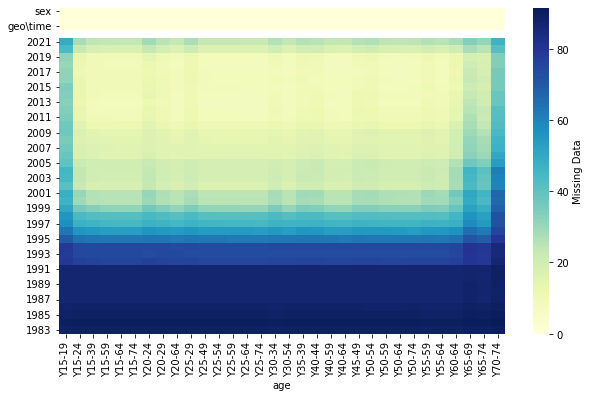

----------------------------------------------------------------------------------------


,sex,isced11,geo\time,age,2021,2020,2019,2018,2017,2016,...,1992,1991,1990,1989,1988,1987,1986,1985,1984,1983
isced11,,,,,,,,,,,,,,,,,,,,,
ED0-2,0.0,NaN,0.0,0.0,19.79,11.65,3.23,2.88,3.15,3.21,...,74.71,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00
ED3_4,0.0,NaN,0.0,0.0,16.51,9.08,1.34,1.42,1.63,1.82,...,75.61,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00
ED5-8,0.0,NaN,0.0,0.0,18.54,11.28,3.24,3.40,3.75,3.64,...,76.29,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00
NRP,0.0,NaN,0.0,0.0,76.24,77.48,64.76,62.21,61.81,63.34,...,88.41,58.42,58.38,58.42,58.38,58.38,61.88,65.31,68.73,65.23
TOTAL,0.0,NaN,0.0,0.0,15.57,7.99,0.27,0.24,0.29,0.29,...,69.50,69.52,69.50,69.52,69.50,69.50,72.06,74.57,77.08,74.52


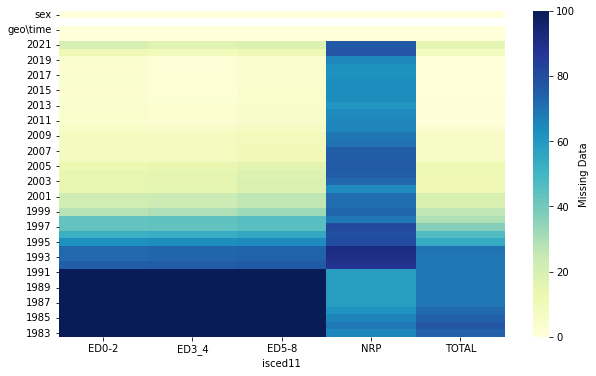

----------------------------------------------------------------------------------------


,sex,isced11,geo\time,age,2021,2020,2019,2018,2017,2016,...,1992,1991,1990,1989,1988,1987,1986,1985,1984,1983
geo\time,,,,,,,,,,,,,,,,,,,,,
AT,0.0,0.0,NaN,0.0,20.08,20.08,19.66,19.66,20.08,20.08,...,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00
BE,0.0,0.0,NaN,0.0,21.46,21.25,21.25,21.46,21.67,21.88,...,23.75,60.83,60.83,60.42,60.42,61.25,60.42,60.00,60.00,60.00
BG,0.0,0.0,NaN,0.0,3.12,3.65,2.08,2.34,2.34,3.65,...,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00
CH,0.0,0.0,NaN,0.0,4.58,7.08,7.71,7.71,7.92,7.71,...,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00
CY,0.0,0.0,NaN,0.0,1.82,1.82,2.08,2.34,3.65,3.65,...,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00
CZ,0.0,0.0,NaN,0.0,16.46,18.54,18.33,12.08,16.25,20.83,...,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00
DE,0.0,0.0,NaN,0.0,18.75,15.42,7.50,6.67,6.67,6.88,...,1.25,60.00,60.00,60.00,60.00,60.00,60.00,60.00,60.00,60.00
DK,0.0,0.0,NaN,0.0,12.71,9.79,5.62,5.00,3.54,5.83,...,23.12,60.00,60.00,60.00,60.00,60.00,60.00,60.00,60.00,60.42
EA19,0.0,0.0,NaN,0.0,3.75,7.71,1.46,1.46,1.67,2.08,...,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00


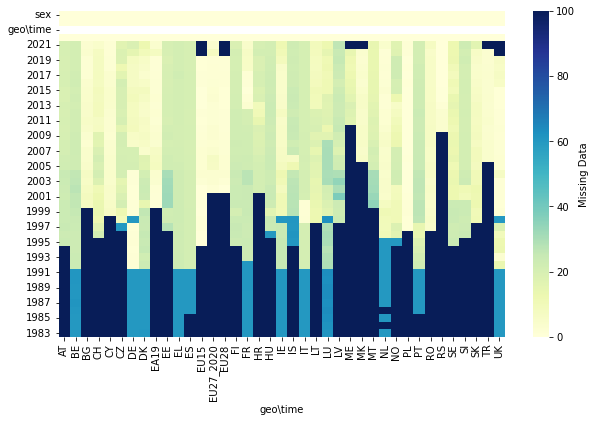

In [31]:
missing_inside(df_employment_example)

<p style="color:black; background-color:white; padding:5px;">In the visualization by gender and age, the dark blue "bottom" showing the high percentage of missing values is very clearly visible. In the visualization by level of education, the dark blue column of "nrp" is clearly visible. In the country-by-country visualization, one can also notice the dark blue columns of countries with distinctly missing values compared to the others for most of the time period studied.</p>

<p style="color:black; background-color:white; padding:5px;">The next feature deepens this approach by moving into a visualization of 2-by-2 combinations of the unique column elements.</p>

In [43]:
def missing_inside_deep (df):
    list1 = []
    for i in df.columns:
        if not df[i].dtype == "float" or df[i].dtype == "int":
            list1 += [i]
            
    for a in range (0, len(list1)):
        for b in range (0, len(list1)):
            if list1[a] == list1[b]:
                pass
            else:
                key = [list1[a],list1[b]]
                count1 = df.groupby(key)[df.columns].count()
                missing1 = df.set_index(key).isna().groupby(key).sum()
                df_percent1 = 100/((count1 + missing1)/missing1)
                df_percent1 = df_percent1.round(2)
                df_percent1 = df_percent1[df_percent1.columns[::-1]]
                print("----------------------------------------------------------------------------------------")
                display(df_percent1)
                plt.figure(figsize=(10,6))
                sns.heatmap(df_percent1.transpose(), cmap="YlGnBu", cbar_kws={'label': 'Missing Data'})
                plt.show()

----------------------------------------------------------------------------------------


sex  isced11  geo\time  age   2021   2020   2019   2018   2017  \
sex age                                                                      
F   Y15-19  NaN      0.0       0.0  NaN  53.33  47.22  36.67  32.22  33.89   
    Y15-24  NaN      0.0       0.0  NaN  27.96  23.12  13.44  12.37  11.29   
    Y15-39  NaN      0.0       0.0  NaN  24.19  17.74   9.14   9.14   9.14   
    Y15-59  NaN      0.0       0.0  NaN  24.19  16.67   9.14   8.60   9.14   
    Y15-64  NaN      0.0       0.0  NaN  23.66  16.67   9.14   8.60   9.14   
...         ...      ...       ...  ...    ...    ...    ...    ...    ...   
T   Y55-64  NaN      0.0       0.0  NaN  24.04  16.94   8.20   8.20   8.20   
    Y60-64  NaN      0.0       0.0  NaN  26.23  19.13  10.38  10.38   9.29   
    Y65-69  NaN      0.0       0.0  NaN  30.43  23.91  15.22  16.85  18.48   
    Y65-74  NaN      0.0       0.0  NaN  29.35  22.83  14.13  14.13  14.13   
    Y70-74  NaN      0.0       0.0  NaN  39.34  32.24  25.68  25.14  26.78   

             2016  ...   1992   1991   1990   1989   1988   1987   1986  \
sex age            ...                                                    
F   Y15-19  35.00  ...  79.44  86.67  86.67  86.67  86.67  86.67  87.78   
    Y15-24  13.44  ...  76.34  87.10  87.10  87.10  87.10  87.10  88.17   
    Y15-39   9.14  ...  75.81  87.10  87.10  87.10  87.10  87.10  88.17   
    Y15-59   9.14  ...  75.27  87.10  87.10  87.10  87.10  87.10  88.17   
    Y15-64   9.14  ...  75.27  87.10  87.10  87.10  87.10  87.10  88.17   
...           ...  ...    ...    ...    ...    ...    ...    ...    ...   
T   Y55-64   8.20  ...  75.41  86.89  86.89  86.89  86.89  86.89  87.98   
    Y60-64  10.38  ...  75.41  86.89  86.89  86.89  86.89  86.89  87.98   
    Y65-69  19.02  ...  78.26  86.96  86.96  88.04  88.04  86.96  89.13   
    Y65-74  14.13  ...  76.63  86.96  86.96  86.96  86.96  86.96  88.04   
    Y70-74  27.87  ...  84.15  87.98  87.98  87.98  87.98  87.98  89.07   

             1985   1984   1983  
sex age                          
F   Y15-19  88.89  90.00  88.89  
    Y15-24  89.25  90.32  89.25  
    Y15-39  89.25  90.32  89.25  
    Y15-59  89.25  90.32  89.25  
    Y15-64  89.25  90.32  89.25  
...           ...    ...    ...  
T   Y55-64  89.07  90.16  89.07  
    Y60-64  89.07  90.16  89.07  
    Y65-69  89.13  90.22  89.13  
    Y65-74  89.13  90.22  89.13  
    Y70-74  90.16  91.26  89.07  

[96 rows x 43 columns]

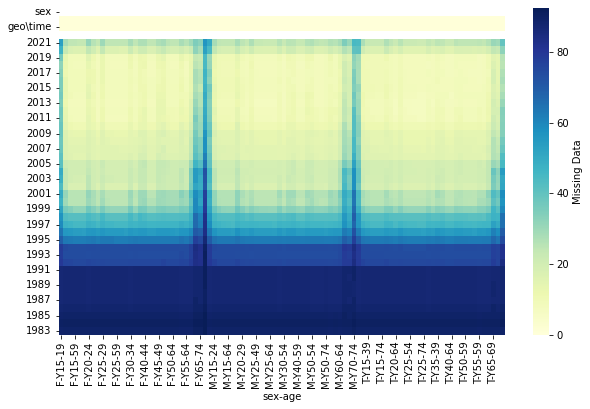

----------------------------------------------------------------------------------------


sex  isced11  geo\time  age   2021   2020   2019   2018   2017  \
sex isced11                                                                   
F   ED0-2    NaN      NaN       0.0  0.0  22.20  13.70   5.37   4.57   5.13   
    ED3_4    NaN      NaN       0.0  0.0  17.07  10.10   2.24   2.40   2.56   
    ED5-8    NaN      NaN       0.0  0.0  19.60  12.45   4.34   4.42   4.90   
    NRP      NaN      NaN       0.0  0.0  80.49  80.27  68.40  64.86  63.97   
    TOTAL    NaN      NaN       0.0  0.0  15.71   8.25   0.48   0.48   0.64   
M   ED0-2    NaN      NaN       0.0  0.0  19.47  11.54   2.80   2.72   2.80   
    ED3_4    NaN      NaN       0.0  0.0  16.51   8.81   1.12   1.12   1.52   
    ED5-8    NaN      NaN       0.0  0.0  18.36  11.11   2.90   3.30   3.62   
    NRP      NaN      NaN       0.0  0.0  76.66  80.26  65.87  62.81  62.38   
    TOTAL    NaN      NaN       0.0  0.0  15.54   7.85   0.16   0.16   0.16   
T   ED0-2    NaN      NaN       0.0  0.0  17.71   9.70   1.52   1.36   1.52   
    ED3_4    NaN      NaN       0.0  0.0  15.95   8.33   0.64   0.72   0.80   
    ED5-8    NaN      NaN       0.0  0.0  17.67  10.28   2.49   2.49   2.73   
    NRP      NaN      NaN       0.0  0.0  71.68  72.00  60.11  59.03  59.14   
    TOTAL    NaN      NaN       0.0  0.0  15.46   7.85   0.16   0.08   0.08   

              2016  ...   1992    1991    1990    1989    1988    1987  \
sex isced11         ...                                                  
F   ED0-2     5.05  ...  74.84  100.00  100.00  100.00  100.00  100.00   
    ED3_4     2.80  ...  76.36  100.00  100.00  100.00  100.00  100.00   
    ED5-8     4.82  ...  77.27  100.00  100.00  100.00  100.00  100.00   
    NRP      65.85  ...  88.58   58.09   58.09   58.09   57.98   58.09   
    TOTAL     0.56  ...  69.71   69.71   69.71   69.71   69.63   69.71   
M   ED0-2     3.04  ...  74.68  100.00  100.00  100.00  100.00  100.00   
    ED3_4     1.68  ...  75.32  100.00  100.00  100.00  100.00  100.00   
    ED5-8     3.38  ...  75.93  100.00  100.00  100.00  100.00  100.00   
    NRP      64.12  ...  88.44   58.56   58.45   58.45   58.45   58.45   
    TOTAL     0.16  ...  69.47   69.55   69.47   69.47   69.47   69.47   
T   ED0-2     1.52  ...  74.60  100.00  100.00  100.00  100.00  100.00   
    ED3_4     0.96  ...  75.16  100.00  100.00  100.00  100.00  100.00   
    ED5-8     2.73  ...  75.66  100.00  100.00  100.00  100.00  100.00   
    NRP      60.11  ...  88.22   58.59   58.59   58.70   58.70   58.59   
    TOTAL     0.16  ...  69.31   69.31   69.31   69.39   69.39   69.31   

               1986    1985    1984    1983  
sex isced11                                  
F   ED0-2    100.00  100.00  100.00  100.00  
    ED3_4    100.00  100.00  100.00  100.00  
    ED5-8    100.00  100.00  100.00  100.00  
    NRP       61.53   65.08   68.51   65.08  
    TOTAL     72.20   74.76   77.24   74.76  
M   ED0-2    100.00  100.00  100.00  100.00  
    ED3_4    100.00  100.00  100.00  100.00  
    ED5-8    100.00  100.00  100.00  100.00  
    NRP       61.94   65.32   68.70   65.21  
    TOTAL     72.04   74.52   77.00   74.44  
T   ED0-2    100.00  100.00  100.00  100.00  
    ED3_4    100.00  100.00  100.00  100.00  
    ED5-8    100.00  100.00  100.00  100.00  
    NRP       62.16   65.51   68.97   65.41  
    TOTAL     71.96   74.44   77.00   74.36  

[15 rows x 43 columns]

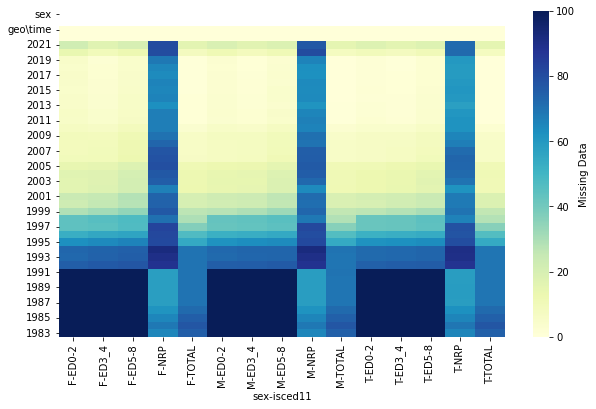

----------------------------------------------------------------------------------------


sex  isced11  geo\time  age    2021    2020   2019   2018  \
sex geo\time                                                              
F   AT        NaN      0.0       NaN  0.0   20.89   20.89  20.25  20.25   
    BE        NaN      0.0       NaN  0.0   22.50   22.50  22.50  22.50   
    BG        NaN      0.0       NaN  0.0    4.69    5.47   3.12   3.12   
    CH        NaN      0.0       NaN  0.0    5.62    6.88   8.75   9.38   
    CY        NaN      0.0       NaN  0.0    3.91    3.91   4.69   5.47   
...           ...      ...       ...  ...     ...     ...    ...    ...   
T   SE        NaN      0.0       NaN  0.0   10.62   10.62  11.25   8.12   
    SI        NaN      0.0       NaN  0.0   21.25   20.62  20.62  20.62   
    SK        NaN      0.0       NaN  0.0   11.72    3.91   3.91   3.12   
    TR        NaN      0.0       NaN  0.0  100.00    4.48   4.48   4.48   
    UK        NaN      0.0       NaN  0.0  100.00  100.00   3.12   3.12   

               2017   2016  ...    1992    1991    1990    1989    1988  \
sex geo\time                ...                                           
F   AT        21.52  21.52  ...  100.00  100.00  100.00  100.00  100.00   
    BE        23.12  23.12  ...   26.25   61.25   61.25   61.25   61.25   
    BG         3.12   5.47  ...  100.00  100.00  100.00  100.00  100.00   
    CH         9.38   9.38  ...  100.00  100.00  100.00  100.00  100.00   
    CY         7.03   6.25  ...  100.00  100.00  100.00  100.00  100.00   
...             ...    ...  ...     ...     ...     ...     ...     ...   
T   SE         6.25   8.12  ...  100.00  100.00  100.00  100.00  100.00   
    SI        20.62  20.62  ...  100.00  100.00  100.00  100.00  100.00   
    SK         3.12   3.91  ...  100.00  100.00  100.00  100.00  100.00   
    TR         4.48   4.48  ...  100.00  100.00  100.00  100.00  100.00   
    UK         5.00   3.12  ...   11.25   60.00   60.00   60.00   60.00   

               1987    1986   1985   1984   1983  
sex geo\time                                      
F   AT        100.0  100.00  100.0  100.0  100.0  
    BE         62.5   61.25   60.0   60.0   60.0  
    BG        100.0  100.00  100.0  100.0  100.0  
    CH        100.0  100.00  100.0  100.0  100.0  
    CY        100.0  100.00  100.0  100.0  100.0  
...             ...     ...    ...    ...    ...  
T   SE        100.0  100.00  100.0  100.0  100.0  
    SI        100.0  100.00  100.0  100.0  100.0  
    SK        100.0  100.00  100.0  100.0  100.0  
    TR        100.0  100.00  100.0  100.0  100.0  
    UK         60.0   60.00   60.0   60.0   60.0  

[117 rows x 43 columns]

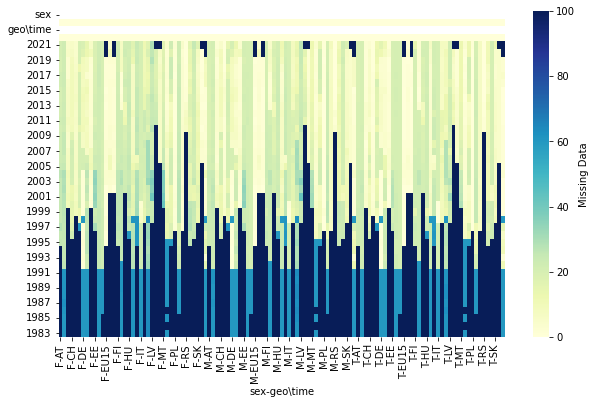

----------------------------------------------------------------------------------------


sex  isced11  geo\time  age   2021   2020   2019   2018   2017  \
age    sex                                                                   
Y15-19 F    NaN      0.0       0.0  NaN  53.33  47.22  36.67  32.22  33.89   
       M    NaN      0.0       0.0  NaN  50.00  44.44  30.56  31.11  34.44   
       T    NaN      0.0       0.0  NaN  44.26  40.98  28.96  28.42  27.87   
Y15-24 F    NaN      0.0       0.0  NaN  27.96  23.12  13.44  12.37  11.29   
       M    NaN      0.0       0.0  NaN  28.19  23.94  13.30  12.77  11.70   
...         ...      ...       ...  ...    ...    ...    ...    ...    ...   
Y65-74 M    NaN      0.0       0.0  NaN  30.43  24.46  15.76  17.39  17.93   
       T    NaN      0.0       0.0  NaN  29.35  22.83  14.13  14.13  14.13   
Y70-74 F    NaN      0.0       0.0  NaN  56.04  52.75  44.51  45.05  46.70   
       M    NaN      0.0       0.0  NaN  44.81  40.44  32.79  31.69  34.97   
       T    NaN      0.0       0.0  NaN  39.34  32.24  25.68  25.14  26.78   

             2016  ...   1992   1991   1990   1989   1988   1987   1986  \
age    sex         ...                                                    
Y15-19 F    35.00  ...  79.44  86.67  86.67  86.67  86.67  86.67  87.78   
       M    32.78  ...  79.44  86.67  86.67  86.67  86.67  86.67  87.78   
       T    27.87  ...  79.23  86.89  86.89  86.89  86.89  86.89  87.98   
Y15-24 F    13.44  ...  76.34  87.10  87.10  87.10  87.10  87.10  88.17   
       M    12.77  ...  77.13  87.23  87.23  87.23  87.23  87.23  88.30   
...           ...  ...    ...    ...    ...    ...    ...    ...    ...   
Y65-74 M    19.02  ...  78.80  88.04  86.96  88.04  88.04  86.96  89.13   
       T    14.13  ...  76.63  86.96  86.96  86.96  86.96  86.96  88.04   
Y70-74 F    46.15  ...  90.66  91.21  91.21  91.21  90.11  90.11  91.21   
       M    35.52  ...  84.15  89.07  89.07  87.98  87.98  89.07  89.07   
       T    27.87  ...  84.15  87.98  87.98  87.98  87.98  87.98  89.07   

             1985   1984   1983  
age    sex                       
Y15-19 F    88.89  90.00  88.89  
       M    88.89  90.00  88.89  
       T    89.07  90.16  89.07  
Y15-24 F    89.25  90.32  89.25  
       M    89.36  90.43  89.36  
...           ...    ...    ...  
Y65-74 M    89.13  90.22  89.13  
       T    89.13  90.22  89.13  
Y70-74 F    92.31  92.31  92.31  
       M    90.16  91.26  90.16  
       T    90.16  91.26  89.07  

[96 rows x 43 columns]

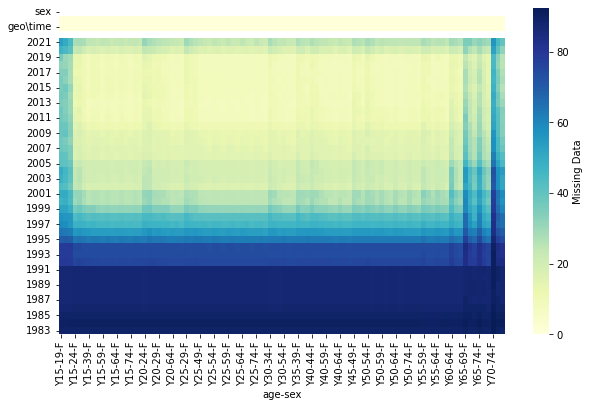

----------------------------------------------------------------------------------------


sex  isced11  geo\time  age    2021    2020   2019    2018  \
age    isced11                                                               
Y15-19 ED0-2    0.0      NaN       0.0  NaN   30.77   23.08  10.26    5.98   
       ED3_4    0.0      NaN       0.0  NaN   25.64   17.09   5.13    5.98   
       ED5-8    0.0      NaN       0.0  NaN   91.43   90.48  75.24   76.19   
       NRP      0.0      NaN       0.0  NaN   96.55  100.00  88.51   82.76   
       TOTAL    0.0      NaN       0.0  NaN   17.95    9.40   0.00    0.00   
...             ...      ...       ...  ...     ...     ...    ...     ...   
Y70-74 ED0-2    0.0      NaN       0.0  NaN   56.41   45.30  34.19   35.04   
       ED3_4    0.0      NaN       0.0  NaN   38.46   30.77  26.50   24.79   
       ED5-8    0.0      NaN       0.0  NaN   36.75   36.75  25.64   24.79   
       NRP      0.0      NaN       0.0  NaN  100.00  100.00  98.75  100.00   
       TOTAL    0.0      NaN       0.0  NaN   18.80   14.53   6.84    5.98   

                 2017    2016  ...   1992    1991    1990    1989    1988  \
age    isced11                 ...                                          
Y15-19 ED0-2     8.55    8.55  ...  74.36  100.00  100.00  100.00  100.00   
       ED3_4     6.84    7.69  ...  74.36  100.00  100.00  100.00  100.00   
       ED5-8    77.14   73.33  ...  93.33  100.00  100.00  100.00  100.00   
       NRP      85.06   87.36  ...  89.66   58.62   58.62   58.62   58.62   
       TOTAL     0.85    0.85  ...  69.23   69.23   69.23   69.23   69.23   
...               ...     ...  ...    ...     ...     ...     ...     ...   
Y70-74 ED0-2    34.19   33.33  ...  80.34  100.00  100.00  100.00  100.00   
       ED3_4    30.77   32.48  ...  94.02  100.00  100.00  100.00  100.00   
       ED5-8    30.77   29.91  ...  91.45  100.00  100.00  100.00  100.00   
       NRP      97.50  100.00  ...  93.75   63.75   63.75   62.50   61.25   
       TOTAL     6.84    6.84  ...  74.36   75.21   75.21   74.36   73.50   

                  1987    1986    1985    1984    1983  
age    isced11                                          
Y15-19 ED0-2    100.00  100.00  100.00  100.00  100.00  
       ED3_4    100.00  100.00  100.00  100.00  100.00  
       ED5-8    100.00  100.00  100.00  100.00  100.00  
       NRP       58.62   62.07   65.52   68.97   65.52  
       TOTAL     69.23   71.79   74.36   76.92   74.36  
...                ...     ...     ...     ...     ...  
Y70-74 ED0-2    100.00  100.00  100.00  100.00  100.00  
       ED3_4    100.00  100.00  100.00  100.00  100.00  
       ED5-8    100.00  100.00  100.00  100.00  100.00  
       NRP       62.50   65.00   68.75   71.25   67.50  
       TOTAL     74.36   76.07   78.63   80.34   77.78  

[160 rows x 43 columns]

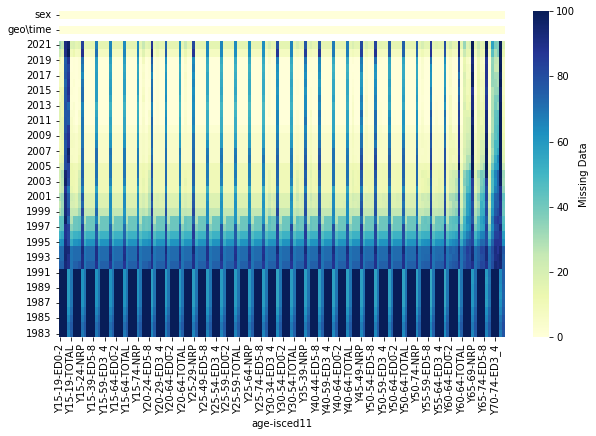

----------------------------------------------------------------------------------------


sex  isced11  geo\time  age    2021    2020   2019   2018  \
age    geo\time                                                              
Y15-19 AT        0.0      0.0       NaN  NaN   33.33   33.33  26.67  26.67   
       BE        0.0      0.0       NaN  NaN   40.00   40.00  40.00  40.00   
       BG        0.0      0.0       NaN  NaN   58.33   66.67  33.33  33.33   
       CH        0.0      0.0       NaN  NaN   40.00   40.00  40.00  40.00   
       CY        0.0      0.0       NaN  NaN   33.33   33.33  33.33  33.33   
...              ...      ...       ...  ...     ...     ...    ...    ...   
Y70-74 SE        0.0      0.0       NaN  NaN   26.67   20.00  20.00  20.00   
       SI        0.0      0.0       NaN  NaN   60.00   46.67  60.00  33.33   
       SK        0.0      0.0       NaN  NaN   91.67   58.33  58.33  58.33   
       TR        0.0      0.0       NaN  NaN  100.00    0.00   0.00   8.33   
       UK        0.0      0.0       NaN  NaN  100.00  100.00  20.00  20.00   

                  2017   2016  ...    1992   1991   1990   1989   1988   1987  \
age    geo\time                ...                                              
Y15-19 AT        33.33  33.33  ...  100.00  100.0  100.0  100.0  100.0  100.0   
       BE        40.00  40.00  ...   40.00   60.0   60.0   60.0   60.0   60.0   
       BG        33.33  41.67  ...  100.00  100.0  100.0  100.0  100.0  100.0   
       CH        40.00  40.00  ...  100.00  100.0  100.0  100.0  100.0  100.0   
       CY        41.67  41.67  ...  100.00  100.0  100.0  100.0  100.0  100.0   
...                ...    ...  ...     ...    ...    ...    ...    ...    ...   
Y70-74 SE        20.00  20.00  ...  100.00  100.0  100.0  100.0  100.0  100.0   
       SI        33.33  40.00  ...  100.00  100.0  100.0  100.0  100.0  100.0   
       SK        58.33  75.00  ...  100.00  100.0  100.0  100.0  100.0  100.0   
       TR        16.67   8.33  ...  100.00  100.0  100.0  100.0  100.0  100.0   
       UK        20.00  20.00  ...   33.33   60.0   60.0   60.0   60.0   60.0   

                  1986   1985   1984   1983  
age    geo\time                              
Y15-19 AT        100.0  100.0  100.0  100.0  
       BE         60.0   60.0   60.0   60.0  
       BG        100.0  100.0  100.0  100.0  
       CH        100.0  100.0  100.0  100.0  
       CY        100.0  100.0  100.0  100.0  
...                ...    ...    ...    ...  
Y70-74 SE        100.0  100.0  100.0  100.0  
       SI        100.0  100.0  100.0  100.0  
       SK        100.0  100.0  100.0  100.0  
       TR        100.0  100.0  100.0  100.0  
       UK         60.0   60.0   60.0   60.0  

[1248 rows x 43 columns]

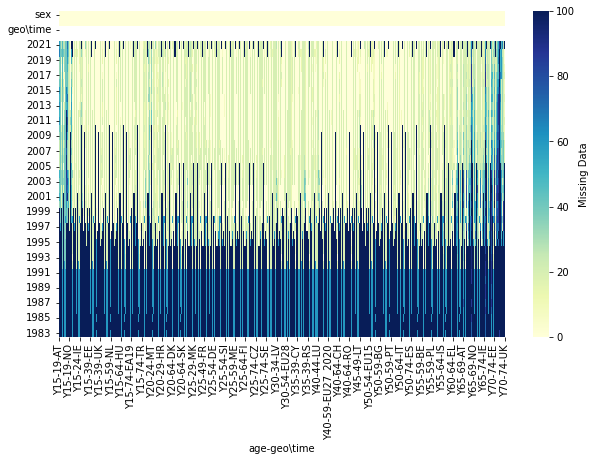

----------------------------------------------------------------------------------------


sex  isced11  geo\time  age   2021   2020   2019   2018   2017  \
isced11 sex                                                                   
ED0-2   F    NaN      NaN       0.0  0.0  22.20  13.70   5.37   4.57   5.13   
        M    NaN      NaN       0.0  0.0  19.47  11.54   2.80   2.72   2.80   
        T    NaN      NaN       0.0  0.0  17.71   9.70   1.52   1.36   1.52   
ED3_4   F    NaN      NaN       0.0  0.0  17.07  10.10   2.24   2.40   2.56   
        M    NaN      NaN       0.0  0.0  16.51   8.81   1.12   1.12   1.52   
        T    NaN      NaN       0.0  0.0  15.95   8.33   0.64   0.72   0.80   
ED5-8   F    NaN      NaN       0.0  0.0  19.60  12.45   4.34   4.42   4.90   
        M    NaN      NaN       0.0  0.0  18.36  11.11   2.90   3.30   3.62   
        T    NaN      NaN       0.0  0.0  17.67  10.28   2.49   2.49   2.73   
NRP     F    NaN      NaN       0.0  0.0  80.49  80.27  68.40  64.86  63.97   
        M    NaN      NaN       0.0  0.0  76.66  80.26  65.87  62.81  62.38   
        T    NaN      NaN       0.0  0.0  71.68  72.00  60.11  59.03  59.14   
TOTAL   F    NaN      NaN       0.0  0.0  15.71   8.25   0.48   0.48   0.64   
        M    NaN      NaN       0.0  0.0  15.54   7.85   0.16   0.16   0.16   
        T    NaN      NaN       0.0  0.0  15.46   7.85   0.16   0.08   0.08   

              2016  ...   1992    1991    1990    1989    1988    1987  \
isced11 sex         ...                                                  
ED0-2   F     5.05  ...  74.84  100.00  100.00  100.00  100.00  100.00   
        M     3.04  ...  74.68  100.00  100.00  100.00  100.00  100.00   
        T     1.52  ...  74.60  100.00  100.00  100.00  100.00  100.00   
ED3_4   F     2.80  ...  76.36  100.00  100.00  100.00  100.00  100.00   
        M     1.68  ...  75.32  100.00  100.00  100.00  100.00  100.00   
        T     0.96  ...  75.16  100.00  100.00  100.00  100.00  100.00   
ED5-8   F     4.82  ...  77.27  100.00  100.00  100.00  100.00  100.00   
        M     3.38  ...  75.93  100.00  100.00  100.00  100.00  100.00   
        T     2.73  ...  75.66  100.00  100.00  100.00  100.00  100.00   
NRP     F    65.85  ...  88.58   58.09   58.09   58.09   57.98   58.09   
        M    64.12  ...  88.44   58.56   58.45   58.45   58.45   58.45   
        T    60.11  ...  88.22   58.59   58.59   58.70   58.70   58.59   
TOTAL   F     0.56  ...  69.71   69.71   69.71   69.71   69.63   69.71   
        M     0.16  ...  69.47   69.55   69.47   69.47   69.47   69.47   
        T     0.16  ...  69.31   69.31   69.31   69.39   69.39   69.31   

               1986    1985    1984    1983  
isced11 sex                                  
ED0-2   F    100.00  100.00  100.00  100.00  
        M    100.00  100.00  100.00  100.00  
        T    100.00  100.00  100.00  100.00  
ED3_4   F    100.00  100.00  100.00  100.00  
        M    100.00  100.00  100.00  100.00  
        T    100.00  100.00  100.00  100.00  
ED5-8   F    100.00  100.00  100.00  100.00  
        M    100.00  100.00  100.00  100.00  
        T    100.00  100.00  100.00  100.00  
NRP     F     61.53   65.08   68.51   65.08  
        M     61.94   65.32   68.70   65.21  
        T     62.16   65.51   68.97   65.41  
TOTAL   F     72.20   74.76   77.24   74.76  
        M     72.04   74.52   77.00   74.44  
        T     71.96   74.44   77.00   74.36  

[15 rows x 43 columns]

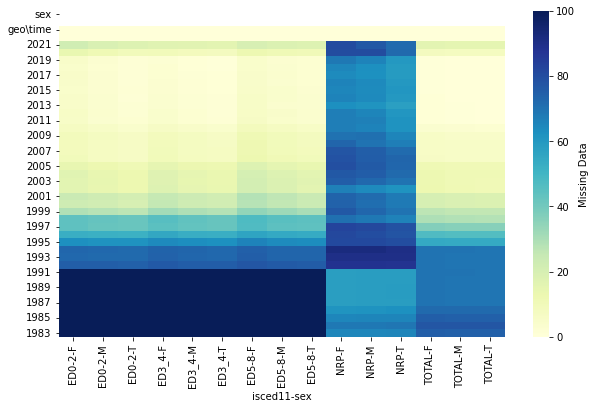

----------------------------------------------------------------------------------------


sex  isced11  geo\time  age   2021   2020   2019  2018  2017  \
isced11 age                                                                    
ED0-2   Y15-19  0.0      NaN       0.0  NaN  30.77  23.08  10.26  5.98  8.55   
        Y15-24  0.0      NaN       0.0  NaN  18.80  12.82   0.85  0.85  0.85   
        Y15-39  0.0      NaN       0.0  NaN  15.38   7.69   0.00  0.00  0.00   
        Y15-59  0.0      NaN       0.0  NaN  15.38   7.69   0.00  0.00  0.00   
        Y15-64  0.0      NaN       0.0  NaN  15.38   7.69   0.00  0.00  0.00   
...             ...      ...       ...  ...    ...    ...    ...   ...   ...   
TOTAL   Y55-64  0.0      NaN       0.0  NaN  15.38   7.69   0.00  0.00  0.00   
        Y60-64  0.0      NaN       0.0  NaN  15.38   7.69   0.00  0.00  0.00   
        Y65-69  0.0      NaN       0.0  NaN  15.38   8.55   0.85  0.85  0.85   
        Y65-74  0.0      NaN       0.0  NaN  15.38   7.69   0.85  0.85  0.85   
        Y70-74  0.0      NaN       0.0  NaN  18.80  14.53   6.84  5.98  6.84   

                2016  ...   1992    1991    1990    1989    1988    1987  \
isced11 age           ...                                                  
ED0-2   Y15-19  8.55  ...  74.36  100.00  100.00  100.00  100.00  100.00   
        Y15-24  2.56  ...  74.36  100.00  100.00  100.00  100.00  100.00   
        Y15-39  0.00  ...  74.36  100.00  100.00  100.00  100.00  100.00   
        Y15-59  0.00  ...  74.36  100.00  100.00  100.00  100.00  100.00   
        Y15-64  0.00  ...  74.36  100.00  100.00  100.00  100.00  100.00   
...              ...  ...    ...     ...     ...     ...     ...     ...   
TOTAL   Y55-64  0.00  ...  69.23   69.23   69.23   69.23   69.23   69.23   
        Y60-64  0.00  ...  69.23   69.23   69.23   69.23   69.23   69.23   
        Y65-69  0.85  ...  70.94   70.94   70.94   71.79   71.79   71.79   
        Y65-74  0.85  ...  70.94   70.94   70.09   70.94   70.94   70.09   
        Y70-74  6.84  ...  74.36   75.21   75.21   74.36   73.50   74.36   

                  1986    1985    1984    1983  
isced11 age                                     
ED0-2   Y15-19  100.00  100.00  100.00  100.00  
        Y15-24  100.00  100.00  100.00  100.00  
        Y15-39  100.00  100.00  100.00  100.00  
        Y15-59  100.00  100.00  100.00  100.00  
        Y15-64  100.00  100.00  100.00  100.00  
...                ...     ...     ...     ...  
TOTAL   Y55-64   71.79   74.36   76.92   74.36  
        Y60-64   71.79   74.36   76.92   74.36  
        Y65-69   74.36   76.07   77.78   75.21  
        Y65-74   73.50   75.21   77.78   75.21  
        Y70-74   76.07   78.63   80.34   77.78  

[160 rows x 43 columns]

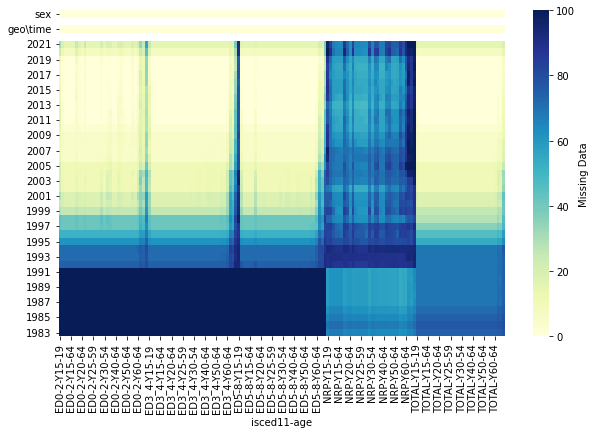

----------------------------------------------------------------------------------------


sex  isced11  geo\time  age    2021    2020  2019  2018  \
isced11 geo\time                                                            
ED0-2   AT        0.0      NaN       NaN  0.0    3.12    3.12  2.08  2.08   
        BE        0.0      NaN       NaN  0.0    1.04    1.04  1.04  2.08   
        BG        0.0      NaN       NaN  0.0    7.29    5.21  4.17  4.17   
        CH        0.0      NaN       NaN  0.0    0.00    0.00  0.00  0.00   
        CY        0.0      NaN       NaN  0.0    2.08    1.04  2.08  2.08   
...               ...      ...       ...  ...     ...     ...   ...   ...   
TOTAL   SE        0.0      NaN       NaN  0.0    0.00    0.00  0.00  0.00   
        SI        0.0      NaN       NaN  0.0    0.00    0.00  0.00  0.00   
        SK        0.0      NaN       NaN  0.0    5.21    0.00  0.00  0.00   
        TR        0.0      NaN       NaN  0.0  100.00    0.00  0.00  0.00   
        UK        0.0      NaN       NaN  0.0  100.00  100.00  0.00  0.00   

                  2017  2016  ...    1992   1991   1990   1989   1988   1987  \
isced11 geo\time              ...                                              
ED0-2   AT        1.04  2.08  ...  100.00  100.0  100.0  100.0  100.0  100.0   
        BE        2.08  3.12  ...    3.12  100.0  100.0  100.0  100.0  100.0   
        BG        4.17  7.29  ...  100.00  100.0  100.0  100.0  100.0  100.0   
        CH        0.00  0.00  ...  100.00  100.0  100.0  100.0  100.0  100.0   
        CY        3.12  1.04  ...  100.00  100.0  100.0  100.0  100.0  100.0   
...                ...   ...  ...     ...    ...    ...    ...    ...    ...   
TOTAL   SE        0.00  0.00  ...  100.00  100.0  100.0  100.0  100.0  100.0   
        SI        0.00  0.00  ...  100.00  100.0  100.0  100.0  100.0  100.0   
        SK        0.00  1.04  ...  100.00  100.0  100.0  100.0  100.0  100.0   
        TR        0.00  0.00  ...  100.00  100.0  100.0  100.0  100.0  100.0   
        UK        0.00  0.00  ...    0.00    0.0    0.0    0.0    0.0    0.0   

                   1986   1985   1984   1983  
isced11 geo\time                              
ED0-2   AT        100.0  100.0  100.0  100.0  
        BE        100.0  100.0  100.0  100.0  
        BG        100.0  100.0  100.0  100.0  
        CH        100.0  100.0  100.0  100.0  
        CY        100.0  100.0  100.0  100.0  
...                 ...    ...    ...    ...  
TOTAL   SE        100.0  100.0  100.0  100.0  
        SI        100.0  100.0  100.0  100.0  
        SK        100.0  100.0  100.0  100.0  
        TR        100.0  100.0  100.0  100.0  
        UK          0.0    0.0    0.0    0.0  

[188 rows x 43 columns]

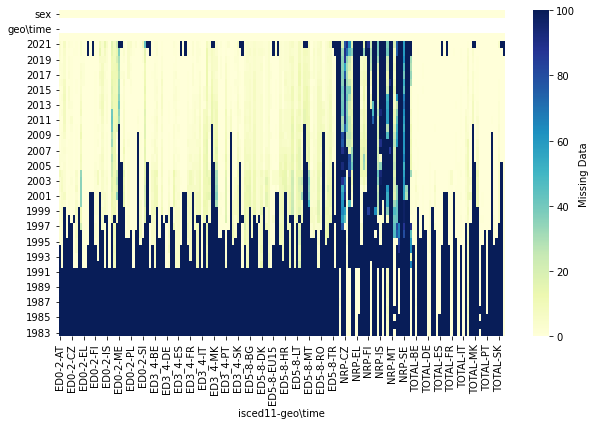

----------------------------------------------------------------------------------------


sex  isced11  geo\time  age    2021    2020   2019   2018  \
geo\time sex                                                              
AT       F    NaN      0.0       NaN  0.0   20.89   20.89  20.25  20.25   
         M    NaN      0.0       NaN  0.0   19.87   19.87  19.23  19.23   
         T    NaN      0.0       NaN  0.0   19.50   19.50  19.50  19.50   
BE       F    NaN      0.0       NaN  0.0   22.50   22.50  22.50  22.50   
         M    NaN      0.0       NaN  0.0   21.25   20.62  20.62  21.25   
...           ...      ...       ...  ...     ...     ...    ...    ...   
TR       M    NaN      0.0       NaN  0.0  100.00    4.48   4.48   4.48   
         T    NaN      0.0       NaN  0.0  100.00    4.48   4.48   4.48   
UK       F    NaN      0.0       NaN  0.0  100.00  100.00   9.38   8.12   
         M    NaN      0.0       NaN  0.0  100.00  100.00   6.25   6.25   
         T    NaN      0.0       NaN  0.0  100.00  100.00   3.12   3.12   

               2017   2016  ...    1992    1991    1990    1989    1988  \
geo\time sex                ...                                           
AT       F    21.52  21.52  ...  100.00  100.00  100.00  100.00  100.00   
         M    19.23  19.23  ...  100.00  100.00  100.00  100.00  100.00   
         T    19.50  19.50  ...  100.00  100.00  100.00  100.00  100.00   
BE       F    23.12  23.12  ...   26.25   61.25   61.25   61.25   61.25   
         M    21.25  21.88  ...   22.50   61.25   61.25   60.00   60.00   
...             ...    ...  ...     ...     ...     ...     ...     ...   
TR       M     4.48   4.48  ...  100.00  100.00  100.00  100.00  100.00   
         T     4.48   4.48  ...  100.00  100.00  100.00  100.00  100.00   
UK       F     8.75   8.75  ...   15.62   60.00   60.00   60.00   60.00   
         M     6.25   6.25  ...   13.12   60.00   60.00   60.00   60.00   
         T     5.00   3.12  ...   11.25   60.00   60.00   60.00   60.00   

                1987    1986   1985   1984   1983  
geo\time sex                                       
AT       F    100.00  100.00  100.0  100.0  100.0  
         M    100.00  100.00  100.0  100.0  100.0  
         T    100.00  100.00  100.0  100.0  100.0  
BE       F     62.50   61.25   60.0   60.0   60.0  
         M     61.25   60.00   60.0   60.0   60.0  
...              ...     ...    ...    ...    ...  
TR       M    100.00  100.00  100.0  100.0  100.0  
         T    100.00  100.00  100.0  100.0  100.0  
UK       F     60.00   60.00   60.0   60.0   60.0  
         M     60.00   60.00   60.0   60.0   60.0  
         T     60.00   60.00   60.0   60.0   60.0  

[117 rows x 43 columns]

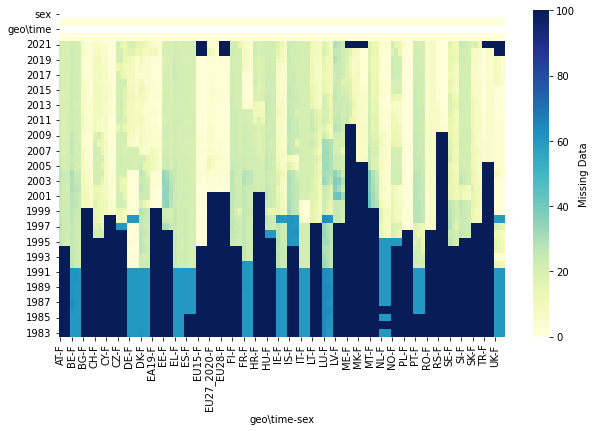

----------------------------------------------------------------------------------------


sex  isced11  geo\time  age    2021    2020   2019   2018  \
geo\time age                                                                 
AT       Y15-19  0.0      0.0       NaN  NaN   33.33   33.33  26.67  26.67   
         Y15-24  0.0      0.0       NaN  NaN   20.00   20.00  20.00  20.00   
         Y15-39  0.0      0.0       NaN  NaN   20.00   20.00  20.00  20.00   
         Y15-59  0.0      0.0       NaN  NaN   20.00   20.00  20.00  20.00   
         Y15-64  0.0      0.0       NaN  NaN   20.00   20.00  20.00  20.00   
...              ...      ...       ...  ...     ...     ...    ...    ...   
UK       Y55-64  0.0      0.0       NaN  NaN  100.00  100.00   0.00   0.00   
         Y60-64  0.0      0.0       NaN  NaN  100.00  100.00  13.33  13.33   
         Y65-69  0.0      0.0       NaN  NaN  100.00  100.00  20.00  20.00   
         Y65-74  0.0      0.0       NaN  NaN  100.00  100.00  20.00  20.00   
         Y70-74  0.0      0.0       NaN  NaN  100.00  100.00  20.00  20.00   

                  2017   2016  ...    1992   1991   1990   1989   1988   1987  \
geo\time age                   ...                                              
AT       Y15-19  33.33  33.33  ...  100.00  100.0  100.0  100.0  100.0  100.0   
         Y15-24  20.00  20.00  ...  100.00  100.0  100.0  100.0  100.0  100.0   
         Y15-39  20.00  20.00  ...  100.00  100.0  100.0  100.0  100.0  100.0   
         Y15-59  20.00  20.00  ...  100.00  100.0  100.0  100.0  100.0  100.0   
         Y15-64  20.00  20.00  ...  100.00  100.0  100.0  100.0  100.0  100.0   
...                ...    ...  ...     ...    ...    ...    ...    ...    ...   
UK       Y55-64   6.67   6.67  ...   20.00   60.0   60.0   60.0   60.0   60.0   
         Y60-64  20.00  20.00  ...   20.00   60.0   60.0   60.0   60.0   60.0   
         Y65-69  20.00  20.00  ...   20.00   60.0   60.0   60.0   60.0   60.0   
         Y65-74  20.00  13.33  ...   20.00   60.0   60.0   60.0   60.0   60.0   
         Y70-74  20.00  20.00  ...   33.33   60.0   60.0   60.0   60.0   60.0   

                  1986   1985   1984   1983  
geo\time age                                 
AT       Y15-19  100.0  100.0  100.0  100.0  
         Y15-24  100.0  100.0  100.0  100.0  
         Y15-39  100.0  100.0  100.0  100.0  
         Y15-59  100.0  100.0  100.0  100.0  
         Y15-64  100.0  100.0  100.0  100.0  
...                ...    ...    ...    ...  
UK       Y55-64   60.0   60.0   60.0   60.0  
         Y60-64   60.0   60.0   60.0   60.0  
         Y65-69   60.0   60.0   60.0   60.0  
         Y65-74   60.0   60.0   60.0   60.0  
         Y70-74   60.0   60.0   60.0   60.0  

[1248 rows x 43 columns]

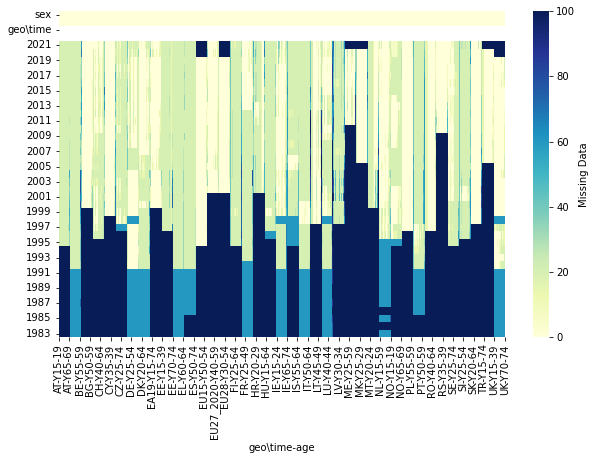

----------------------------------------------------------------------------------------


sex  isced11  geo\time  age    2021    2020    2019    2018  \
geo\time isced11                                                                
AT       ED0-2    0.0      NaN       NaN  0.0    3.12    3.12    2.08    2.08   
         ED3_4    0.0      NaN       NaN  0.0    0.00    0.00    0.00    0.00   
         ED5-8    0.0      NaN       NaN  0.0    3.12    3.12    2.08    2.08   
         NRP      0.0      NaN       NaN  0.0  100.00  100.00  100.00  100.00   
         TOTAL    0.0      NaN       NaN  0.0    0.00    0.00    0.00    0.00   
...               ...      ...       ...  ...     ...     ...     ...     ...   
UK       ED0-2    0.0      NaN       NaN  0.0  100.00  100.00    0.00    0.00   
         ED3_4    0.0      NaN       NaN  0.0  100.00  100.00    0.00    0.00   
         ED5-8    0.0      NaN       NaN  0.0  100.00  100.00    0.00    0.00   
         NRP      0.0      NaN       NaN  0.0  100.00  100.00   31.25   29.17   
         TOTAL    0.0      NaN       NaN  0.0  100.00  100.00    0.00    0.00   

                    2017    2016  ...    1992   1991   1990   1989   1988  \
geo\time isced11                  ...                                       
AT       ED0-2      1.04    2.08  ...  100.00  100.0  100.0  100.0  100.0   
         ED3_4      1.04    0.00  ...  100.00  100.0  100.0  100.0  100.0   
         ED5-8      4.17    4.17  ...  100.00  100.0  100.0  100.0  100.0   
         NRP      100.00  100.00  ...  100.00  100.0  100.0  100.0  100.0   
         TOTAL      0.00    0.00  ...  100.00  100.0  100.0  100.0  100.0   
...                  ...     ...  ...     ...    ...    ...    ...    ...   
UK       ED0-2      0.00    0.00  ...    0.00  100.0  100.0  100.0  100.0   
         ED3_4      0.00    0.00  ...    1.04  100.0  100.0  100.0  100.0   
         ED5-8      0.00    0.00  ...    1.04  100.0  100.0  100.0  100.0   
         NRP       33.33   30.21  ...   64.58    0.0    0.0    0.0    0.0   
         TOTAL      0.00    0.00  ...    0.00    0.0    0.0    0.0    0.0   

                   1987   1986   1985   1984   1983  
geo\time isced11                                     
AT       ED0-2    100.0  100.0  100.0  100.0  100.0  
         ED3_4    100.0  100.0  100.0  100.0  100.0  
         ED5-8    100.0  100.0  100.0  100.0  100.0  
         NRP      100.0  100.0  100.0  100.0  100.0  
         TOTAL    100.0  100.0  100.0  100.0  100.0  
...                 ...    ...    ...    ...    ...  
UK       ED0-2    100.0  100.0  100.0  100.0  100.0  
         ED3_4    100.0  100.0  100.0  100.0  100.0  
         ED5-8    100.0  100.0  100.0  100.0  100.0  
         NRP        0.0    0.0    0.0    0.0    0.0  
         TOTAL      0.0    0.0    0.0    0.0    0.0  

[188 rows x 43 columns]

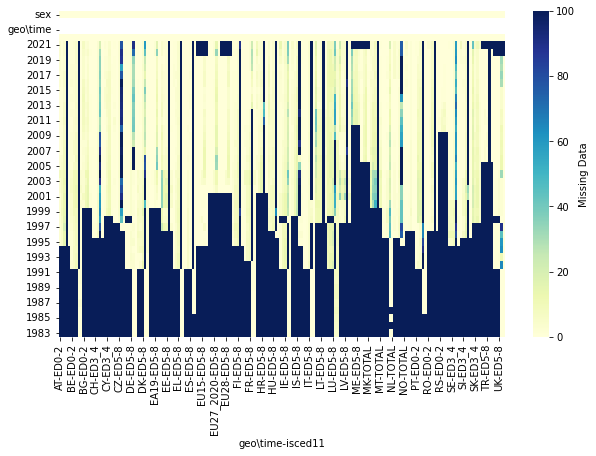

In [44]:
missing_inside_deep(df_employment_example)

<p style="color:black; background-color:white; padding:5px;">Maybe not all visualizations will give "valuable information" but their importance is to map the missing values in detail. In this way, it will be difficult to miss a certain dependency that will give rise to excess shortages.</p>

---

<h3 style="color:black; background-color:white; padding:5px; padding-bottom:10px; margin-bottom:-10px">9. Remove patterns and compare the result </h3>
<p style="color:black; background-color:white; padding:5px;">
Although the goal of the analysis is to find rather than deal with missing values, one step in that direction will be shown. In the steps up to this point, we have seen that one element of the columns has super-missing values - the NRP in the education column. As an example, let's define this missing part, remove it from the database, and visualize the change in the missing values.</p>

In [45]:
df_nrp = df_employment_example[df_employment_example["isced11"] == "NRP"]
df_nrp

,sex,age,isced11,geo\time,2021,2020,2019,2018,2017,2016,...,1992,1991,1990,1989,1988,1987,1986,1985,1984,1983
114,F,Y15-19,NRP,AT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
115,F,Y15-19,NRP,BE,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,6.3,5.8,5.8,6.7,7.1,8.9,8.9,8.7,10.9
116,F,Y15-19,NRP,CH,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
117,F,Y15-19,NRP,CZ,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
118,F,Y15-19,NRP,DE,NaN,NaN,NaN,18.7,24.0,NaN,...,16.6,34.3,34.7,34.9,34.7,34.5,34.5,34.6,33.9,27.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17664,T,Y70-74,NRP,NO,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17665,T,Y70-74,NRP,PT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,13.9,11.7,12.3,13.6,13.5,11.0,NaN,NaN,NaN
17666,T,Y70-74,NRP,SE,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17667,T,Y70-74,NRP,SI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

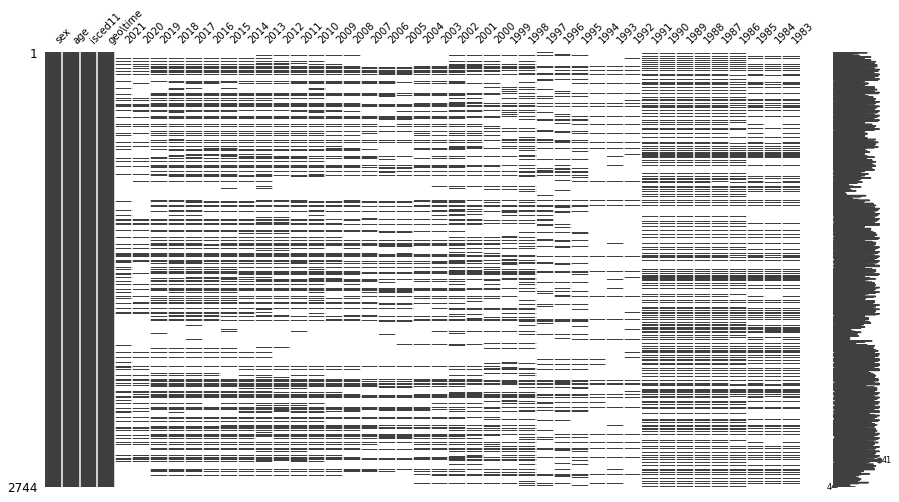

In [46]:
msno.matrix(df_nrp, figsize=(15, 8), fontsize=10)

In [56]:
df_employment_example_nrp = df_employment_example.copy()
df_employment_example_nrp.drop(df_employment_example_nrp.index[[*df_nrp.index]], inplace=True)

In [57]:
print(f"Original database: {df_employment_example.shape}")
print(f"Removed NRP database: {df_employment_example_nrp.shape}")

Original database: (17708, 43)
Removed NRP database: (14964, 43)


In [58]:
uniques(df_employment_example_nrp)

Names of columns (features): 
Index(['sex', 'age', 'isced11', 'geo\time', '2021', '2020', '2019', '2018',
       '2017', '2016', '2015', '2014', '2013', '2012', '2011', '2010', '2009',
       '2008', '2007', '2006', '2005', '2004', '2003', '2002', '2001', '2000',
       '1999', '1998', '1997', '1996', '1995', '1994', '1993', '1992', '1991',
       '1990', '1989', '1988', '1987', '1986', '1985', '1984', '1983'],
      dtype='object')

Elements of columns (observations): "sex": 
 ['F' 'M' 'T']
Number of elements of columns (observations): "sex": 
 3

Elements of columns (observations): "age": 
 ['Y15-19' 'Y15-24' 'Y15-39' 'Y15-59' 'Y15-64' 'Y15-74' 'Y20-24' 'Y20-29'
 'Y20-64' 'Y25-29' 'Y25-49' 'Y25-54' 'Y25-59' 'Y25-64' 'Y25-74' 'Y30-34'
 'Y30-54' 'Y35-39' 'Y40-44' 'Y40-59' 'Y40-64' 'Y45-49' 'Y50-54' 'Y50-59'
 'Y50-64' 'Y50-74' 'Y55-59' 'Y55-64' 'Y60-64' 'Y65-69' 'Y65-74' 'Y70-74']
Number of elements of columns (observations): "age": 
 32

Elements of columns (observations): "isced11": 


In [61]:
def change_missing_values (df, outliers):
    dd = df.isna().sum().to_frame(name=None).index.astype(str)
    
    fig, ax = plt.subplots(figsize=(10,12))

    barh1 = plt.barh(dd, df.isna().sum().to_frame(name=None)[0])
    barh2 = plt.barh(dd, outliers.isna().sum().to_frame(name=None)[0])
    
    ax.bar_label(barh1)
    ax.bar_label(barh2, color='w', fmt='%.2f')
    ax.set_ylabel('Scores')
    ax.set_title('Scores by group and gender')
    ax.set_xlabel('Scores1')
    fig.tight_layout()
    plt.xticks(rotation=90)  
    plt.show()

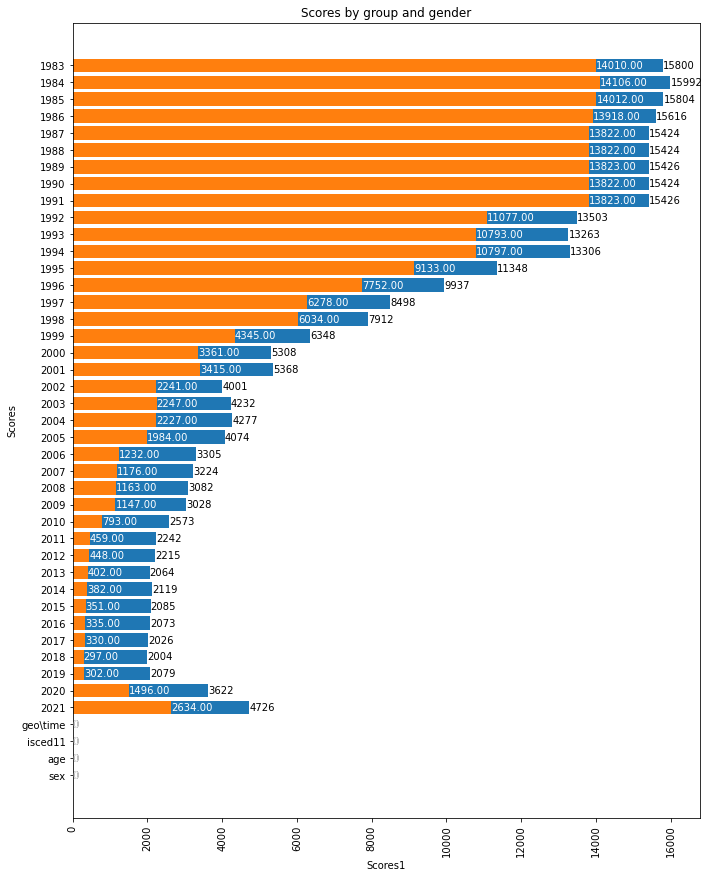

In [60]:
change_missing_values(df_employment_example, df_employment_example_nrp)

<p style="color:black; background-color:white; padding:5px;">We see how finding a pattern in missing values and removing it leads to a dramatic drop in missing values across the entire database. </p>

---

<h3 style="color:black; background-color:white; padding:5px; padding-bottom:10px; margin-bottom:-10px">10. Cluster visualization of missing values </h3>
<p style="color:black; background-color:white; padding:5px;">
An interesting approach is the use of clustering methods to group the missing values in the form of cluster patterns.</p>

<p style="color:black; background-color:white; padding:5px;">
As an example, grouping of missing values by year for the education column will be used.</p>

In [119]:
df_employment_isced11 = df_employment_example.set_index('isced11').isna().groupby('isced11').sum()
df_employment_isced11 = df_employment_isced11.iloc[:, 4:]
df_employment_isced11.head()

,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,...,1992,1991,1990,1989,1988,1987,1986,1985,1984,1983
isced11,,,,,,,,,,,,,,,,,,,,,
ED0-2,436,121,108,118,120,115,125,136,150,144,...,2797,3744,3744,3744,3744,3744,3744,3744,3744,3744
ED3_4,340,50,53,61,68,73,84,88,101,105,...,2831,3744,3744,3744,3744,3744,3744,3744,3744,3744
ED5-8,421,121,127,140,136,151,158,160,178,185,...,2847,3732,3732,3732,3732,3732,3732,3732,3732,3732
NRP,2126,1777,1707,1696,1738,1734,1737,1662,1767,1783,...,2426,1603,1602,1603,1602,1602,1698,1792,1886,1790
TOTAL,299,10,9,11,11,12,15,18,19,25,...,2602,2603,2602,2603,2602,2602,2698,2792,2886,2790


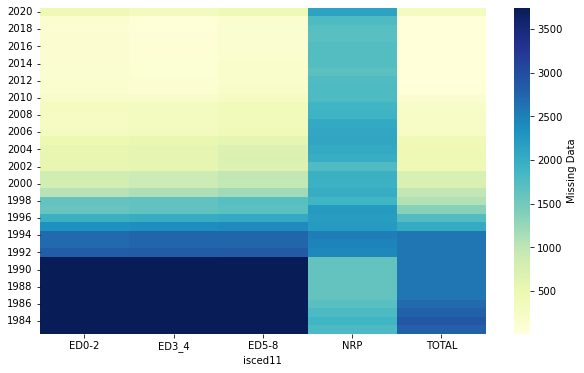

In [90]:
plt.figure(figsize=(10,6))
sns.heatmap(df_employment_isced11.transpose(), cmap="YlGnBu", cbar_kws={'label': 'Missing Data'})
plt.show()

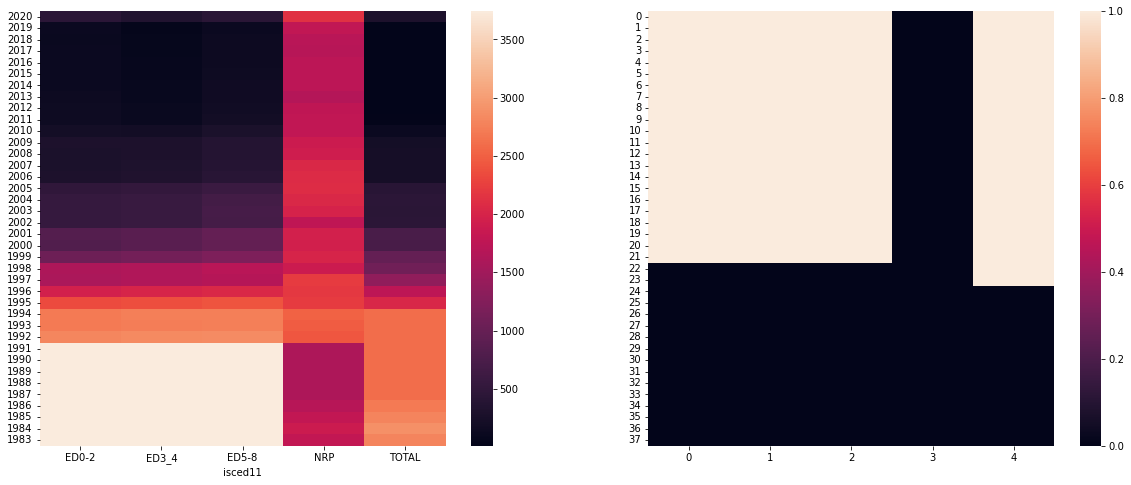

In [ ]:
from sklearn.cluster import KMeans
Y = df_employment_isced11.to_numpy()
Y = Y.reshape(-1, 1)

kmeans= KMeans(init='k-means++', n_clusters=2, n_init=10)
kmeans.fit(Y)

Z = kmeans.labels_
A = Z.reshape(5,38)

fig, ax =plt.subplots(1,2, figsize=(20, 8))
sns.heatmap(df_employment_isced11.transpose(),  ax=ax[0])
sns.heatmap(A.transpose(),  ax=ax[1])
plt.show()

<p style="color:black; background-color:white; padding:5px;">
Using the clustering method K-means with 2 number of clusters indicated, we see the separation of the years up to 1996 and the NRP as one cluster and all other years and elements - second.</p>

<h2 style="color:black; background-color:white; padding:5px; padding-bottom:10px;margin-bottom:-10px">IV. Conclusion </h2>
<p style="color:black; background-color:white; padding:5px;">In conclusion, we can say that the inevitability of additional studies of the missing data is important for any study in the preparatory period. This report provides a glimpse into possible tools for deeper exploration and definition of patterns and patterns in missing data. This includes methods for absolute - relative values by columns and rows, as well as in combination between them, visualization, clustering, aulayers, etc. Correct detection of missing data is important for subsequent steps to work with or remove it. The possibilities for operating with them will be the subject of a subsequent report.</p>